# **1. Business Understanding**

## Overview


 Untuk memahami dan mengelola stok produk dengan lebih efisien, kami memodelkan data menggunakan analisis time series forecasting. Dalam bisnis, stok produk yang tidak tepat dapat mengakibatkan biaya berlebihan akibat penumpukan barang atau hilangnya penjualan akibat kekurangan stok. Suatu bisnis yang baik tentunya harus dapat mengelola dan memanajemen seluruh aspek, salah satunya stok produk.

 Tujuan:
 - Mengoptimalkan stok produk (mengurangi risiko understock dan overstock)
 - Mengurangi kehilangan penjualan
 - Meningkatkan kepuasan pelanggan


# **2. Data Preparation**

### **2.1 Library**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import pandas as pd
import json

# Data Collection
import ast

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Export Output DataFrame
from google.colab import files

# Machine Learning (disesuaikan dengan algoritma yang dipakai)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **2.2 Read Dataset**

In [ ]:
# Read Dataset use Google Drive
df_product = pd.read_csv('/content/drive/MyDrive/product.csv')
df_customer = pd.read_csv('/content/drive/MyDrive/customer.csv')
df_transactions = pd.read_csv('/content/drive/MyDrive/transactions.csv')
df_transactions2 = pd.read_csv('/content/drive/MyDrive/transactions.csv')

In [ ]:
df_clickstream = pd.read_csv('/content/drive/MyDrive/click_stream.csv')

## **2.3 Data Collection**

### **2.3.1 Transaction Dataset**

In [ ]:
df_transactions.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753


In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [ ]:
# Change data type to save memory
df_transactions[['payment_method', 'payment_status', 'promo_code']] = df_transactions[['payment_method', 'payment_status', 'promo_code']].astype('category')
df_transactions['shipment_date_limit'] = df_transactions['shipment_date_limit'].astype('datetime64')
df_transactions['created_at'] = df_transactions['created_at'].astype('datetime64')

In [ ]:
#change the data type of column 'product_metadata' to be literal

tmp = df_transactions.iloc[:,4].astype('string')
tmp = tmp.map(lambda x: ast.literal_eval(x))
tmp = tmp.to_frame()
df_transactions['product_metadata'] = tmp['product_metadata']

# explode
df_transactions = df_transactions.explode('product_metadata')
df_transactions.shape

(1254585, 14)

In [ ]:
type(df_transactions.iloc[2,4])

dict

In [ ]:
df_transactions.reset_index()

,index,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,0,2018-07-29 15:22:01.458193,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"{'product_id': 54728, 'quantity': 1, 'item_pri...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676,-8.227893,111.969107,199832
1,1,2018-07-30 12:40:22.365620,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"{'product_id': 16193, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,10000,2018-08-03 01:29:03.415705,3.013470,107.802514,155526
2,2,2018-09-15 11:51:17.365620,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"{'product_id': 53686, 'quantity': 4, 'item_pri...",OVO,Success,0,NaN,10000,2018-09-18 08:41:49.422380,-2.579428,115.743885,550696
3,3,2018-11-01 11:23:48.365620,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"{'product_id': 20228, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,0,2018-11-05 17:42:27.954235,-3.602334,120.363824,271012
4,4,2018-12-18 11:20:30.365620,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"{'product_id': 55220, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,0,2018-12-23 17:24:07.361785,-3.602334,120.363824,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,852579,2021-09-21 22:10:05.074873,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,"{'product_id': 30642, 'quantity': 2, 'item_pri...",Debit Card,Failed,0,NaN,0,2021-09-27 00:43:40.992167,-6.869535,111.077145,226820
1254581,852580,2021-12-09 07:35:18.222046,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,"{'product_id': 19394, 'quantity': 1, 'item_pri...",OVO,Success,5010,AZ2022,10000,2021-12-12 07:52:44.803822,-8.677264,115.176947,359203
1254582,852581,2021-12-11 01:20:36.944593,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,"{'product_id': 13079, 'quantity': 4, 'item_pri...",Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12 13:28:22.848703,-6.185498,106.831093,1158159
1254583,852582,2019-12-18 11:01:09.623382,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,"{'product_id': 11312, 'quantity': 1, 'item_pri...",Credit Card,Success,4503,AZ2022,0,2019-12-23 22:56:46.831720,-7.155977,110.891858,184143


In [ ]:
import json
df_metadata = pd.json_normalize(df_transactions.product_metadata)

In [ ]:
df_transactions = pd.concat([df_transactions.reset_index(), df_metadata], join = 'outer',axis = 1)

In [ ]:
df_transactions.head()

,index,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,0,2018-07-29 15:22:01.458193,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"{'product_id': 54728, 'quantity': 1, 'item_pri...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676,-8.227893,111.969107,199832,54728,1,191247
1,1,2018-07-30 12:40:22.365620,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"{'product_id': 16193, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,10000,2018-08-03 01:29:03.415705,3.013470,107.802514,155526,16193,1,145526
2,2,2018-09-15 11:51:17.365620,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"{'product_id': 53686, 'quantity': 4, 'item_pri...",OVO,Success,0,NaN,10000,2018-09-18 08:41:49.422380,-2.579428,115.743885,550696,53686,4,135174
3,3,2018-11-01 11:23:48.365620,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"{'product_id': 20228, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,0,2018-11-05 17:42:27.954235,-3.602334,120.363824,271012,20228,1,271012
4,4,2018-12-18 11:20:30.365620,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"{'product_id': 55220, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,0,2018-12-23 17:24:07.361785,-3.602334,120.363824,198753,55220,1,198753


In [ ]:
total_item_price = df_metadata['item_price'].sum()
total_item_price

313614182253

In [ ]:
total_total_amount = df_transactions2['total_amount'].sum()
total_total_amount

468850022169

In [ ]:
df_transactions2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

### **2.3.2 Click Stream Dataset**

In [ ]:
df_clickstream.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}


In [ ]:
df_clickstream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [ ]:
## Change data type to save memory

df_clickstream[['event_name', 'traffic_source']] = df_clickstream[['event_name', 'traffic_source']].astype('category')
df_clickstream[['event_time']] = df_clickstream[['event_time']].astype('datetime64')

### **Add To Cart**

In [ ]:
add_to_cart = df_clickstream[(df_clickstream['event_name'] == 'ADD_TO_CART')]

In [ ]:
add_to_cart = add_to_cart.reset_index()
add_to_cart = add_to_cart.drop('index', axis=1)
add_to_cart

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
1,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:06:03.425431,c1b42157-39a7-4521-a4dc-ed0200de301a,MOBILE,"{'product_id': 6133, 'quantity': 2, 'item_pric..."
2,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:23:36.425431,61cbe834-c585-406e-8eac-30f671e51fbb,MOBILE,"{'product_id': 6721, 'quantity': 1, 'item_pric..."
3,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:42:03.425431,2bd3f01a-e062-4c13-8b9d-598fb5379ed2,MOBILE,"{'product_id': 57622, 'quantity': 1, 'item_pri..."
4,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:58:58.425431,ba1c5f20-869a-42be-878c-75496c28aba3,MOBILE,"{'product_id': 5490, 'quantity': 1, 'item_pric..."
...,...,...,...,...,...,...
1937152,f38416ce-51f2-46b0-a476-776d8fed1cb0,ADD_TO_CART,2021-08-01 08:02:26.737783,c5aaef2b-0732-4f27-a1a4-d3dd4e5e7c6f,WEB,"{'product_id': 4869, 'quantity': 1, 'item_pric..."
1937153,c1ce86f6-858b-4009-af5b-f1483a28d020,ADD_TO_CART,2020-09-22 22:45:47.674560,83bf5984-1a3b-438d-94fd-23d451dfb73b,WEB,"{'product_id': 25127, 'quantity': 1, 'item_pri..."
1937154,f5c4bbe0-f977-45bb-af23-6ab524df7777,ADD_TO_CART,2022-04-09 21:01:14.132472,9b24acc0-09f2-41ad-b591-6409660cb0b7,MOBILE,"{'product_id': 19386, 'quantity': 1, 'item_pri..."
1937155,ad1063b0-a6e5-40a9-aed6-d1b45741e571,ADD_TO_CART,2021-06-07 04:38:05.354381,ed7a0b57-5992-4a13-86f4-34425370d43b,MOBILE,"{'product_id': 13143, 'quantity': 1, 'item_pri..."


In [ ]:
add_to_cart['event_metadata'] = add_to_cart['event_metadata'].astype(str)

In [ ]:
#change the type data of column 'event_metadata' to be literal

tmp = add_to_cart.iloc[:,5].astype('str')
tmp = tmp.map(lambda x: ast.literal_eval(x))
tmp = tmp.to_frame()
add_to_cart['event_metadata'] = tmp['event_metadata']

In [ ]:
type(add_to_cart.iloc[2,5])

dict

In [ ]:
df_event = pd.DataFrame(list(add_to_cart['event_metadata']))
df_event

,product_id,quantity,item_price
0,15315,4,313529
1,6133,2,249443
2,6721,1,134504
3,57622,1,384716
4,5490,1,121318
...,...,...,...
1937152,4869,1,282771
1937153,25127,1,166365
1937154,19386,1,208644
1937155,13143,1,284949


In [ ]:
add_to_cart = pd.concat([add_to_cart, df_event], axis=1)
add_to_cart

,session_id,event_name,event_time,event_id,traffic_source,event_metadata,product_id,quantity,item_price
0,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri...",15315,4,313529
1,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:06:03.425431,c1b42157-39a7-4521-a4dc-ed0200de301a,MOBILE,"{'product_id': 6133, 'quantity': 2, 'item_pric...",6133,2,249443
2,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:23:36.425431,61cbe834-c585-406e-8eac-30f671e51fbb,MOBILE,"{'product_id': 6721, 'quantity': 1, 'item_pric...",6721,1,134504
3,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:42:03.425431,2bd3f01a-e062-4c13-8b9d-598fb5379ed2,MOBILE,"{'product_id': 57622, 'quantity': 1, 'item_pri...",57622,1,384716
4,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:58:58.425431,ba1c5f20-869a-42be-878c-75496c28aba3,MOBILE,"{'product_id': 5490, 'quantity': 1, 'item_pric...",5490,1,121318
...,...,...,...,...,...,...,...,...,...
1937152,f38416ce-51f2-46b0-a476-776d8fed1cb0,ADD_TO_CART,2021-08-01 08:02:26.737783,c5aaef2b-0732-4f27-a1a4-d3dd4e5e7c6f,WEB,"{'product_id': 4869, 'quantity': 1, 'item_pric...",4869,1,282771
1937153,c1ce86f6-858b-4009-af5b-f1483a28d020,ADD_TO_CART,2020-09-22 22:45:47.674560,83bf5984-1a3b-438d-94fd-23d451dfb73b,WEB,"{'product_id': 25127, 'quantity': 1, 'item_pri...",25127,1,166365
1937154,f5c4bbe0-f977-45bb-af23-6ab524df7777,ADD_TO_CART,2022-04-09 21:01:14.132472,9b24acc0-09f2-41ad-b591-6409660cb0b7,MOBILE,"{'product_id': 19386, 'quantity': 1, 'item_pri...",19386,1,208644
1937155,ad1063b0-a6e5-40a9-aed6-d1b45741e571,ADD_TO_CART,2021-06-07 04:38:05.354381,ed7a0b57-5992-4a13-86f4-34425370d43b,MOBILE,"{'product_id': 13143, 'quantity': 1, 'item_pri...",13143,1,284949


In [ ]:
add_to_cart.rename(columns={'quantity': 'prob_quantity'}, inplace=True)
add_to_cart

,session_id,event_name,event_time,event_id,traffic_source,event_metadata,product_id,prob_quantity,item_price
0,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri...",15315,4,313529
1,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:06:03.425431,c1b42157-39a7-4521-a4dc-ed0200de301a,MOBILE,"{'product_id': 6133, 'quantity': 2, 'item_pric...",6133,2,249443
2,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:23:36.425431,61cbe834-c585-406e-8eac-30f671e51fbb,MOBILE,"{'product_id': 6721, 'quantity': 1, 'item_pric...",6721,1,134504
3,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:42:03.425431,2bd3f01a-e062-4c13-8b9d-598fb5379ed2,MOBILE,"{'product_id': 57622, 'quantity': 1, 'item_pri...",57622,1,384716
4,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:58:58.425431,ba1c5f20-869a-42be-878c-75496c28aba3,MOBILE,"{'product_id': 5490, 'quantity': 1, 'item_pric...",5490,1,121318
...,...,...,...,...,...,...,...,...,...
1937152,f38416ce-51f2-46b0-a476-776d8fed1cb0,ADD_TO_CART,2021-08-01 08:02:26.737783,c5aaef2b-0732-4f27-a1a4-d3dd4e5e7c6f,WEB,"{'product_id': 4869, 'quantity': 1, 'item_pric...",4869,1,282771
1937153,c1ce86f6-858b-4009-af5b-f1483a28d020,ADD_TO_CART,2020-09-22 22:45:47.674560,83bf5984-1a3b-438d-94fd-23d451dfb73b,WEB,"{'product_id': 25127, 'quantity': 1, 'item_pri...",25127,1,166365
1937154,f5c4bbe0-f977-45bb-af23-6ab524df7777,ADD_TO_CART,2022-04-09 21:01:14.132472,9b24acc0-09f2-41ad-b591-6409660cb0b7,MOBILE,"{'product_id': 19386, 'quantity': 1, 'item_pri...",19386,1,208644
1937155,ad1063b0-a6e5-40a9-aed6-d1b45741e571,ADD_TO_CART,2021-06-07 04:38:05.354381,ed7a0b57-5992-4a13-86f4-34425370d43b,MOBILE,"{'product_id': 13143, 'quantity': 1, 'item_pri...",13143,1,284949


## **2.4 EDA ( Exploratory Data  Analysis)**

### **2.4.1 Data Wrangling**

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [ ]:
df_customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [ ]:
# Change data type to save memory

df_customer[['gender','device_type', 'device_version', 'home_location', 'home_country']] = df_customer[['gender','device_type', 'device_version', 'home_location', 'home_country']].astype('category')
df_customer[['birthdate', 'first_join_date']] = df_customer[['birthdate', 'first_join_date']].astype('datetime64')

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  category      
 6   birthdate           100000 non-null  datetime64[ns]
 7   device_type         100000 non-null  category      
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  category      
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  category      
 13  home_country        100000 non

In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
 10  Unnamed: 10         21 non-null     object 
 11  Unnamed: 11         2 non-null      object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
df_product.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10,Unnamed: 11
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,NaN,NaN
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,NaN,NaN
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,NaN,NaN
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,NaN,NaN
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,NaN,NaN


In [ ]:
# Change data type to save memory

df_product[['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage', 'productDisplayName']] = df_product[['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage', 'productDisplayName']].astype('category')

In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  44446 non-null  int64   
 1   gender              44446 non-null  category
 2   masterCategory      44446 non-null  category
 3   subCategory         44446 non-null  category
 4   articleType         44446 non-null  category
 5   baseColour          44431 non-null  category
 6   season              44425 non-null  category
 7   year                44445 non-null  float64 
 8   usage               44129 non-null  category
 9   productDisplayName  44439 non-null  category
 10  Unnamed: 10         21 non-null     object  
 11  Unnamed: 11         2 non-null      object  
dtypes: category(8), float64(1), int64(1), object(2)
memory usage: 3.0+ MB


In [ ]:
df_product.rename(columns={'id': 'product_id'}, inplace=True)

In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   index                   1254585 non-null  int64         
 1   created_at              1254585 non-null  datetime64[ns]
 2   customer_id             1254585 non-null  int64         
 3   booking_id              1254585 non-null  object        
 4   session_id              1254585 non-null  object        
 5   product_metadata        1254585 non-null  object        
 6   payment_method          1254585 non-null  category      
 7   payment_status          1254585 non-null  category      
 8   promo_amount            1254585 non-null  int64         
 9   promo_code              481139 non-null   category      
 10  shipment_fee            1254585 non-null  int64         
 11  shipment_date_limit     1254585 non-null  datetime64[ns]
 12  shipment_locat

### **2.4.2 Master Dataset**

In [ ]:
master_dataset = df_transactions[['customer_id','session_id','product_id','created_at', 'quantity', 'item_price','booking_id','payment_method', 'payment_status', 'promo_code','promo_amount','shipment_fee']].merge(df_customer[['customer_id', 'gender', 'birthdate', 'home_location', 'home_country']], on="customer_id", how="right")
master_dataset = master_dataset.merge(df_transactions2[['session_id','total_amount']], on="session_id", how="left")
master_dataset = master_dataset.merge(df_product[['product_id','gender', 'masterCategory', 'subCategory', 'articleType','usage','baseColour' ,'year','season']], on="product_id", how="left")

In [ ]:
master_dataset.head()

,customer_id,session_id,product_id,created_at,quantity,item_price,booking_id,payment_method,payment_status,promo_code,...,home_country,total_amount,gender_y,masterCategory,subCategory,articleType,usage,baseColour,year,season
0,2870,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8193,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7279,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,18015.0,2020-08-23 12:53:12.916342,1.0,305982.0,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,LinkAja,Success,WEEKENDSERU,...,Indonesia,844751.0,Women,Accessories,Belts,Belts,Casual,Brown,2015.0,Winter
3,7279,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,2401.0,2020-08-23 12:53:12.916342,2.0,263311.0,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,LinkAja,Success,WEEKENDSERU,...,Indonesia,844751.0,Men,Apparel,Topwear,Tshirts,Sports,White,2010.0,Fall
4,7279,82396d8d-7d8a-436d-8e14-75f24aa35faa,12449.0,2020-08-31 13:34:59.916342,1.0,381341.0,eed52035-1f80-422c-b0ac-a1c814e77bcf,LinkAja,Success,NaN,...,Indonesia,391341.0,Unisex,Accessories,Shoe Accessories,Shoe Accessories,NaN,Brown,2011.0,Fall


In [ ]:
# Menjumlahkan nilai dalam kolom 'quantity'

total_quantity = master_dataset['quantity'].value_counts()
total_quantity

1.0     1038635
2.0      100715
3.0       41464
4.0       23559
5.0       14478
6.0        9865
7.0        6900
8.0        4868
9.0        3491
10.0       2537
11.0       1896
12.0       1390
13.0       1105
14.0        848
15.0        656
16.0        485
17.0        376
18.0        259
19.0        242
20.0        182
21.0        145
22.0        103
23.0         80
24.0         55
25.0         53
26.0         44
27.0         43
29.0         19
28.0         17
33.0         14
31.0         14
32.0         11
34.0          8
36.0          5
35.0          4
40.0          4
38.0          3
30.0          3
41.0          3
39.0          2
48.0          1
37.0          1
43.0          1
42.0          1
Name: quantity, dtype: int64

In [ ]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303880 entries, 0 to 1303879
Data columns (total 25 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   customer_id     1303880 non-null  int64         
 1   session_id      1254585 non-null  object        
 2   product_id      1254585 non-null  float64       
 3   created_at      1254585 non-null  datetime64[ns]
 4   quantity        1254585 non-null  float64       
 5   item_price      1254585 non-null  float64       
 6   booking_id      1254585 non-null  object        
 7   payment_method  1254585 non-null  category      
 8   payment_status  1254585 non-null  category      
 9   promo_code      481139 non-null   category      
 10  promo_amount    1254585 non-null  float64       
 11  shipment_fee    1254585 non-null  float64       
 12  gender_x        1303880 non-null  category      
 13  birthdate       1303880 non-null  datetime64[ns]
 14  home_location   13

### **2.4.3 Data Cleaning**

In [ ]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303880 entries, 0 to 1303879
Data columns (total 25 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   customer_id     1303880 non-null  int64         
 1   session_id      1254585 non-null  object        
 2   product_id      1254585 non-null  float64       
 3   created_at      1254585 non-null  datetime64[ns]
 4   quantity        1254585 non-null  float64       
 5   item_price      1254585 non-null  float64       
 6   booking_id      1254585 non-null  object        
 7   payment_method  1254585 non-null  category      
 8   payment_status  1254585 non-null  category      
 9   promo_code      481139 non-null   category      
 10  promo_amount    1254585 non-null  float64       
 11  shipment_fee    1254585 non-null  float64       
 12  gender_x        1303880 non-null  category      
 13  birthdate       1303880 non-null  datetime64[ns]
 14  home_location   13

In [ ]:
master_dataset.dtypes

customer_id                int64
session_id                object
product_id               float64
created_at        datetime64[ns]
quantity                 float64
item_price               float64
booking_id                object
payment_method          category
payment_status          category
promo_code              category
promo_amount             float64
shipment_fee             float64
gender_x                category
birthdate         datetime64[ns]
home_location           category
home_country            category
total_amount             float64
gender_y                category
masterCategory          category
subCategory             category
articleType             category
usage                   category
baseColour              category
year                     float64
season                  category
dtype: object

In [ ]:
 #Checking null values

master_dataset.isna().sum()

customer_id            0
session_id         49295
product_id         49295
created_at         49295
quantity           49295
item_price         49295
booking_id         49295
payment_method     49295
payment_status     49295
promo_code        822741
promo_amount       49295
shipment_fee       49295
gender_x               0
birthdate              0
home_location          0
home_country           0
total_amount       49295
gender_y           49295
masterCategory     49295
subCategory        49295
articleType        49295
usage              58166
baseColour         49702
year               49323
season             49898
dtype: int64

In [ ]:
# Check size dataset

print('Ukuran dataset %d baris dan %d kolom' % master_dataset.shape)

Ukuran dataset 1303880 baris dan 25 kolom


In [ ]:
kolom_yang_diisi_dengan_0 = ['quantity','created_at', 'item_price', 'total_amount', 'shipment_fee', 'promo_amount']
master_dataset[kolom_yang_diisi_dengan_0] = master_dataset[kolom_yang_diisi_dengan_0].fillna(0)

In [ ]:
# Konversi kolom kategorikal menjadi tipe data 'object'
master_dataset['usage'] = master_dataset['usage'].astype('object')
master_dataset['baseColour'] = master_dataset['baseColour'].astype('object')
master_dataset['promo_code'] = master_dataset['promo_code'].astype('object')
master_dataset['session_id'] = master_dataset['session_id'].astype('object')
master_dataset['product_id'] = master_dataset['product_id'].astype('object')
master_dataset['booking_id'] = master_dataset['booking_id'].astype('object')
master_dataset['payment_method'] = master_dataset['payment_method'].astype('object')
master_dataset['payment_status'] = master_dataset['payment_status'].astype('object')
master_dataset['gender_y'] = master_dataset['gender_y'].astype('object')
master_dataset['masterCategory'] = master_dataset['masterCategory'].astype('object')
master_dataset['subCategory'] = master_dataset['subCategory'].astype('object')
master_dataset['articleType'] = master_dataset['articleType'].astype('object')
master_dataset['year'] = master_dataset['year'].astype('object')
master_dataset['season'] = master_dataset['season'].astype('object')

# Mengisi nilai null dengan kata 'unknown'
master_dataset.fillna("unknown", inplace=True)

In [ ]:
master_dataset.isna().sum()

customer_id       0
session_id        0
product_id        0
created_at        0
quantity          0
item_price        0
booking_id        0
payment_method    0
payment_status    0
promo_code        0
promo_amount      0
shipment_fee      0
gender_x          0
birthdate         0
home_location     0
home_country      0
total_amount      0
gender_y          0
masterCategory    0
subCategory       0
articleType       0
usage             0
baseColour        0
year              0
season            0
dtype: int64

In [ ]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303880 entries, 0 to 1303879
Data columns (total 25 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   customer_id     1303880 non-null  int64         
 1   session_id      1303880 non-null  object        
 2   product_id      1303880 non-null  object        
 3   created_at      1303880 non-null  object        
 4   quantity        1303880 non-null  float64       
 5   item_price      1303880 non-null  float64       
 6   booking_id      1303880 non-null  object        
 7   payment_method  1303880 non-null  object        
 8   payment_status  1303880 non-null  object        
 9   promo_code      1303880 non-null  object        
 10  promo_amount    1303880 non-null  float64       
 11  shipment_fee    1303880 non-null  float64       
 12  gender_x        1303880 non-null  category      
 13  birthdate       1303880 non-null  datetime64[ns]
 14  home_location   13

In [ ]:
master_dataset['promo_amount'] = master_dataset['promo_amount'].astype('float64')



### **2.4.4 Insight dan Data  Visualization**

In [ ]:
master_dataset = pd.read_csv('/content/drive/MyDrive/master_dataset.csv')

In [ ]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303880 entries, 0 to 1303879
Data columns (total 25 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   customer_id     1303880 non-null  int64  
 1   session_id      1303880 non-null  object 
 2   product_id      1303880 non-null  object 
 3   created_at      1303880 non-null  object 
 4   quantity        1303880 non-null  float64
 5   item_price      1303880 non-null  float64
 6   booking_id      1303880 non-null  object 
 7   payment_method  1303880 non-null  object 
 8   payment_status  1303880 non-null  object 
 9   promo_code      1303880 non-null  object 
 10  promo_amount    1303880 non-null  float64
 11  shipment_fee    1303880 non-null  float64
 12  gender_x        1303880 non-null  object 
 13  birthdate       1303880 non-null  object 
 14  home_location   1303880 non-null  object 
 15  home_country    1303880 non-null  object 
 16  total_amount    1303880 non-null  fl

In [ ]:
master_dataset['created_at'] = pd.to_datetime(master_dataset['created_at'], errors='coerce')

# Drop rows with invalid dates
master_dataset = master_dataset.dropna(subset=['created_at'])

# Filter DataFrame for transactions with payment_status 'Success'
master_dataset_success = master_dataset[master_dataset['payment_status'] == 'Failed']

# Extract year and month from 'created_at'
master_dataset_success['Year'] = master_dataset_success['created_at'].dt.year
master_dataset_success['Month'] = master_dataset_success['created_at'].dt.month

# Calculate the sum of quantities for each month in each year
transaction_data = master_dataset_success.groupby(['Year', 'masterCategory'])['quantity'].sum().unstack()

# Display the results
print("Jumlah Transaksi Failed Berdasarkan Bulan pada Setiap Tahun:")
print(transaction_data)

Jumlah Transaksi Failed Berdasarkan Bulan pada Setiap Tahun:
masterCategory  Accessories  Apparel  Footwear  Free Items  Home  \
Year                                                               
2016                  116.0    197.0     106.0         3.0   NaN   
2017                  896.0   1586.0     682.0         3.0   NaN   
2018                 1843.0   3169.0    1356.0        15.0   NaN   
2019                 2662.0   4832.0    2173.0        20.0   NaN   
2020                 4085.0   7435.0    3249.0        64.0   NaN   
2021                 6118.0  11112.0    4873.0        62.0   4.0   
2022                 4483.0   8745.0    3925.0        46.0   2.0   

masterCategory  Personal Care  Sporting Goods  
Year                                           
2016                     61.0             NaN  
2017                    189.0             NaN  
2018                    343.0             1.0  
2019                    565.0             4.0  
2020                    896.0         

<ipython-input-19-df23adc3fc61>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataset_success['Year'] = master_dataset_success['created_at'].dt.year
<ipython-input-19-df23adc3fc61>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataset_success['Month'] = master_dataset_success['created_at'].dt.month


In [ ]:
# Distribusi untuk kolom 'baseColour'
success_payments = master_dataset[master_dataset['payment_status'] == 'Success']

base_colour_distribution = success_payments.groupby('baseColour')['quantity'].sum()

# Mengurutkan distribusi dari yang tertinggi ke yang terendah
base_colour_distribution_sorted = base_colour_distribution.sort_values(ascending=False)

# Menampilkan hasilnya
print("Distribusi baseColour berdasarkan quantity (payment_status = Success), diurutkan:")
print(base_colour_distribution_sorted)

Distribusi baseColour berdasarkan quantity (payment_status = Success), diurutkan:
baseColour
Black                388963.0
White                221639.0
Blue                 196909.0
Brown                139188.0
Grey                 109321.0
Red                   96848.0
Green                 84292.0
Pink                  73614.0
Navy Blue             71129.0
Purple                64698.0
Silver                43570.0
Yellow                30970.0
Beige                 29709.0
Gold                  25321.0
Maroon                23529.0
Orange                21123.0
Olive                 16369.0
Cream                 15719.0
Multi                 15560.0
Steel                 12562.0
Charcoal               9198.0
Peach                  7927.0
Skin                   7300.0
Off White              7273.0
Lavender               6682.0
Grey Melange           5929.0
Khaki                  5622.0
Magenta                5097.0
Teal                   4733.0
Tan                    4641.0
Bronze 

Penjualan Setiap Master Category berdasarkan Quantity (payment_status = Success), diurutkan:
masterCategory
Apparel           853175.0
Accessories       450070.0
Footwear          367746.0
Personal Care      96252.0
Free Items          4202.0
Sporting Goods       944.0
Home                  20.0
Name: quantity, dtype: float64

Persentase Penjualan Master Category untuk Semua Produk:
masterCategory
Apparel           48.136463
Accessories       25.393123
Footwear          20.748371
Personal Care      5.430575
Free Items         0.237078
Sporting Goods     0.053261
Home               0.001128
Name: quantity, dtype: float64


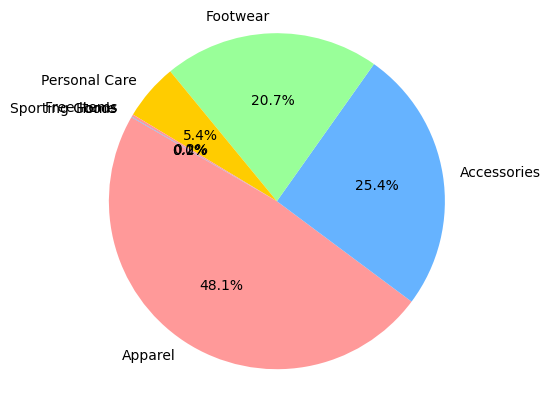

In [ ]:
# Menggabungkan DataFrame berdasarkan nilai 'Success' pada kolom 'payment_status'
merged_df = master_dataset[master_dataset['payment_status'] == 'Success']

# Menghitung penjualan setiap masterCategory berdasarkan quantity
master_category_sales = merged_df.groupby('masterCategory')['quantity'].sum()

# Mengurutkan penjualan dari yang tertinggi ke yang terendah
master_category_sales_sorted = master_category_sales.sort_values(ascending=False)

# Menghitung persentase penjualan masterCategory untuk semua produk
total_quantity_sold = master_category_sales_sorted.sum()
top_master_category_percentage = (master_category_sales_sorted / total_quantity_sold) * 100

# Menampilkan hasil
print("Penjualan Setiap Master Category berdasarkan Quantity (payment_status = Success), diurutkan:")
print(master_category_sales_sorted)

print("\nPersentase Penjualan Master Category untuk Semua Produk:")
print(top_master_category_percentage)

# Menggunakan variabel yang benar untuk plot pie chart
labels = top_master_category_percentage.index
sizes = top_master_category_percentage.values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc00']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=150)
ax1.axis('equal')
plt.show()

In [ ]:
# Menghitung jumlah payment_status berdasarkan quantity
payment_status_counts = master_dataset.groupby('payment_status')['quantity'].sum()

# Mengurutkan hasil dari yang tertinggi ke yang terendah
payment_status_counts_sorted = payment_status_counts.sort_values(ascending=False)

# Menghitung total quantity
total_quantity = master_dataset['quantity'].sum()

# Menghitung persentase payment_status berdasarkan quantity
payment_status_percentage = (payment_status_counts_sorted / total_quantity) * 100

# Menampilkan hasil
print("Jumlah Payment Status berdasarkan Quantity (diurutkan):")
print(payment_status_counts_sorted)

print("\nPersentase Payment Status berdasarkan Quantity:")
print(payment_status_percentage)

Jumlah Payment Status berdasarkan Quantity (diurutkan):
payment_status
Success    1772409.0
Failed       78265.0
unknown          0.0
Name: quantity, dtype: float64

Persentase Payment Status berdasarkan Quantity:
payment_status
Success    95.771
Failed      4.229
unknown     0.000
Name: quantity, dtype: float64


<ipython-input-33-4424a882db24>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataset_success['Year'] = master_dataset_success['created_at'].dt.year
<ipython-input-33-4424a882db24>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataset_success['Month'] = master_dataset_success['created_at'].dt.month


Jumlah Transaksi Berdasarkan Bulan pada Setiap Tahun:
Month       1        2        3        4        5        6        7        8   \
Year                                                                            
2016       NaN      NaN      NaN      NaN      NaN      3.0    557.0   1093.0   
2017    3015.0   3168.0   4160.0   4327.0   5065.0   4790.0   7063.0   6835.0   
2018    9111.0   8973.0  10626.0  11142.0  11985.0  11129.0  14285.0  13991.0   
2019   16933.0  15569.0  17478.0  17889.0  19677.0  19043.0  21518.0  21962.0   
2020   24587.0  24834.0  27413.0  26994.0  27736.0  28444.0  31121.0  32509.0   
2021   37879.0  35173.0  40114.0  39580.0  42469.0  41126.0  45392.0  47962.0   
2022   56351.0  52028.0  59496.0  60784.0  62148.0  59137.0  52420.0      NaN   

Month       9        10       11       12  
Year                                       
2016    1629.0   2101.0   2427.0   2321.0  
2017    7402.0   8220.0   8482.0   8777.0  
2018   13634.0  15338.0  15572.0  16251.

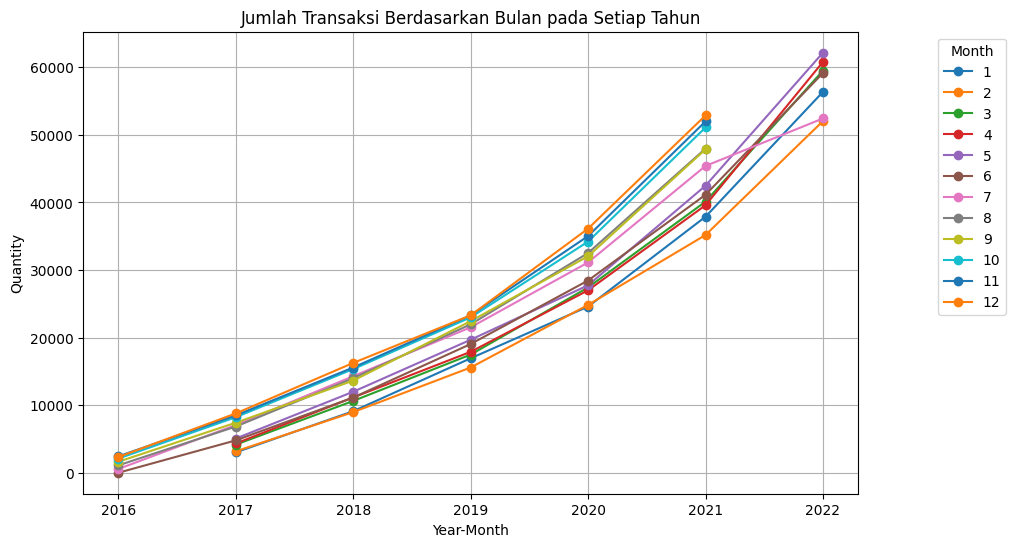

In [ ]:
master_dataset['created_at'] = pd.to_datetime(master_dataset['created_at'], errors='coerce')

# Drop rows with invalid dates
master_dataset = master_dataset.dropna(subset=['created_at'])

# Filter DataFrame for transactions with payment_status 'Success'
master_dataset_success = master_dataset[master_dataset['payment_status'] == 'Success']

# Extract year and month from 'created_at'
master_dataset_success['Year'] = master_dataset_success['created_at'].dt.year
master_dataset_success['Month'] = master_dataset_success['created_at'].dt.month

# Calculate the sum of quantities for each month in each year
transaction_data = master_dataset_success.groupby(['Year', 'Month'])['quantity'].sum().unstack()

# Display the results
print("Jumlah Transaksi Berdasarkan Bulan pada Setiap Tahun:")
print(transaction_data)

ax = transaction_data.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Year-Month')
plt.ylabel('Quantity')
plt.title('Jumlah Transaksi Berdasarkan Bulan pada Setiap Tahun')
plt.legend(title='Month', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()

In [ ]:
# Distribusi untuk kolom 'articleType'
article_type_distribution = master_dataset['articleType'].value_counts()
article_type_distribution

Tshirts                199030
Shirts                  90844
Casual Shoes            80215
Watches                 71391
Sports Shoes            57583
                        ...  
Ipad                       31
Mens Grooming Kit          30
Body Wash and Scrub        27
Hair Accessory             25
Cushion Covers             19
Name: articleType, Length: 144, dtype: int64

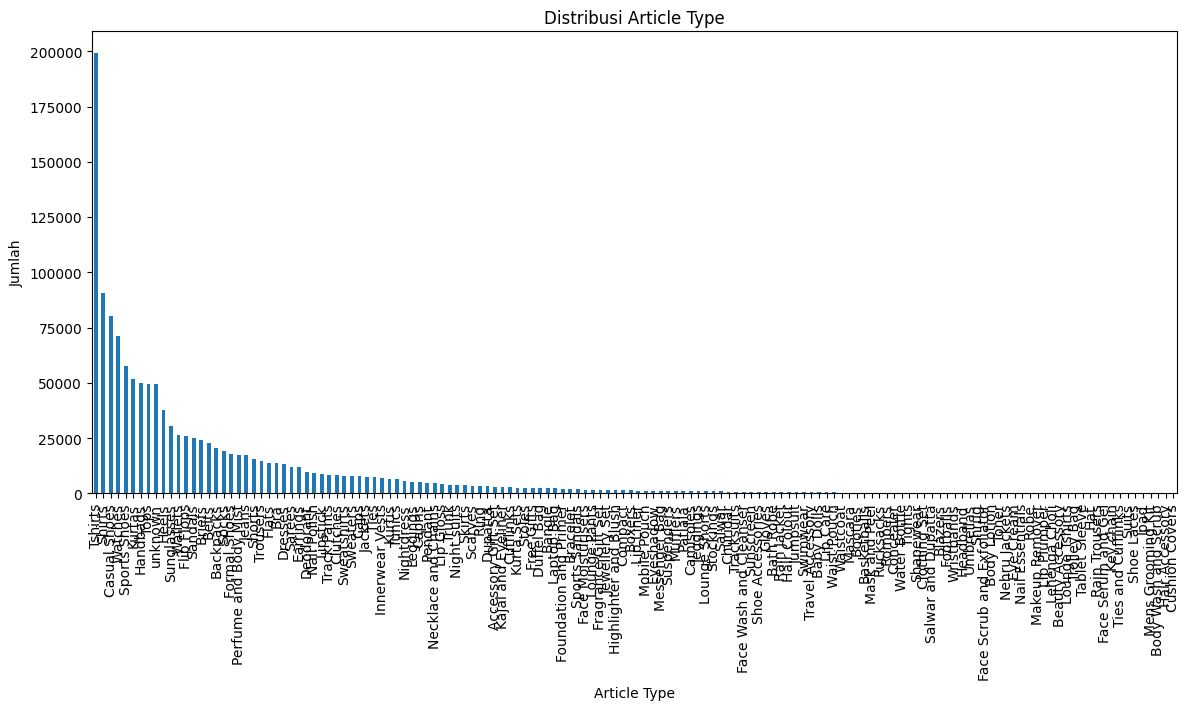

In [ ]:
master_dataset['articleType'].value_counts().plot(kind='bar', figsize=(14, 6))
plt.title('Distribusi Article Type')
plt.xlabel('Article Type')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
gender_distribution = df_customer['gender'].value_counts()
gender_distribution

F    64230
M    35770
Name: gender, dtype: int64

In [ ]:
total_amount = master_dataset['total_amount'].sum()
total_amount

1482384718578.0

In [ ]:
payment_method_counts = master_dataset['payment_method'].value_counts()
print(payment_method_counts)

Credit Card    439876
Gopay          251577
OVO            249065
Debit Card     202552
LinkAja        111515
unknown         49295
Name: payment_method, dtype: int64


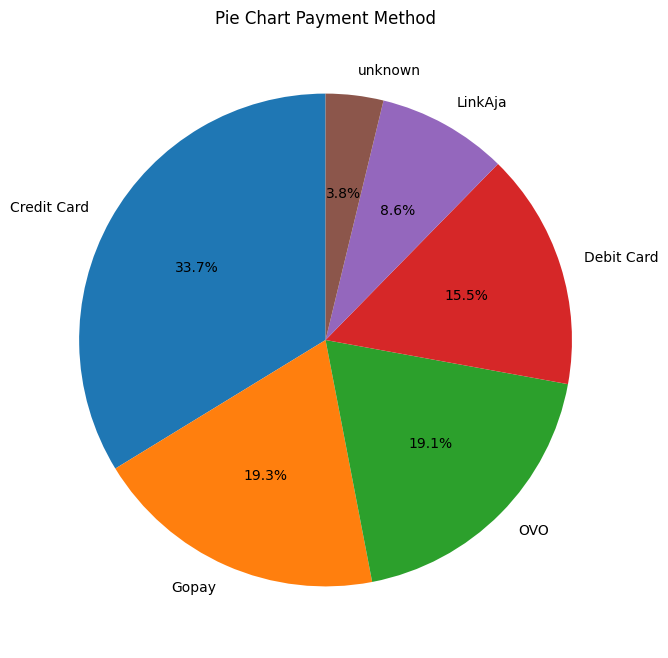

In [ ]:
payment_method_counts = master_dataset['payment_method'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart Payment Method')
plt.show()

In [ ]:
promo_amount_stats = master_dataset['promo_amount'].describe()
print(promo_amount_stats)

count    1.303880e+06
mean     1.969490e+03
std      3.035263e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.855000e+03
max      2.451900e+04
Name: promo_amount, dtype: float64


<Figure size 800x600 with 0 Axes>

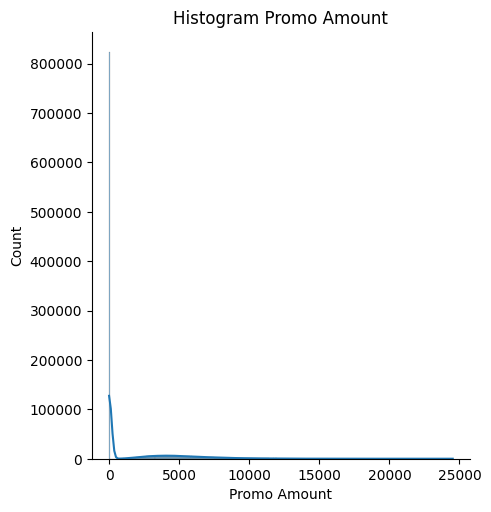

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sns.displot(master_dataset['promo_amount'], kde=True)
plt.title('Histogram Promo Amount')
plt.xlabel('Promo Amount')
plt.show()

In [ ]:
shipment_fee_stats = master_dataset['shipment_fee'].describe()
print(shipment_fee_stats)

count    1.303880e+06
mean     8.843387e+03
std      9.358766e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+04
75%      1.000000e+04
max      5.000000e+04
Name: shipment_fee, dtype: float64


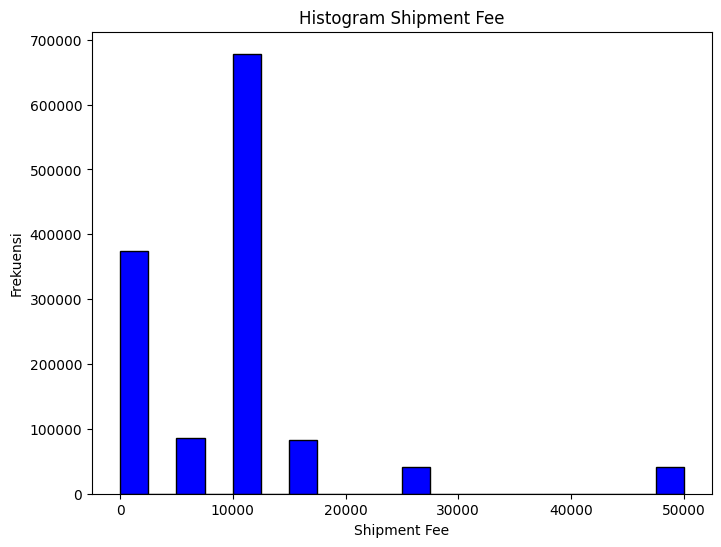

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(master_dataset['shipment_fee'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram Shipment Fee')
plt.xlabel('Shipment Fee')
plt.ylabel('Frekuensi')
plt.show()


In [ ]:
prob_quantity_distribution = add_to_cart['prob_quantity'].describe()
print(prob_quantity_distribution)

count    1.937157e+06
mean     1.439845e+00
std      1.488880e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      4.800000e+01
Name: prob_quantity, dtype: float64


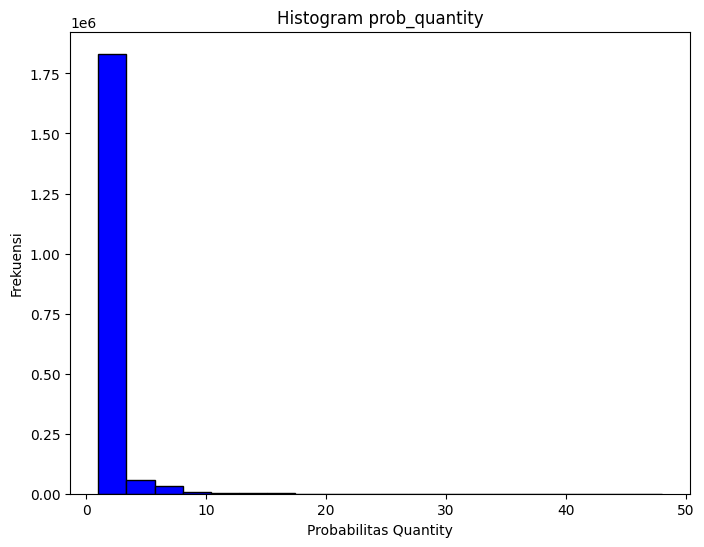

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(add_to_cart['prob_quantity'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram prob_quantity')
plt.xlabel('Probabilitas Quantity')
plt.ylabel('Frekuensi')
plt.show()


<ipython-input-75-6a134e9a295b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topwear.rename(columns = {"articleType":"Clothes"},inplace=True)


Text(0.5, 1.0, 'Penjualan Pakaian Terlaris')

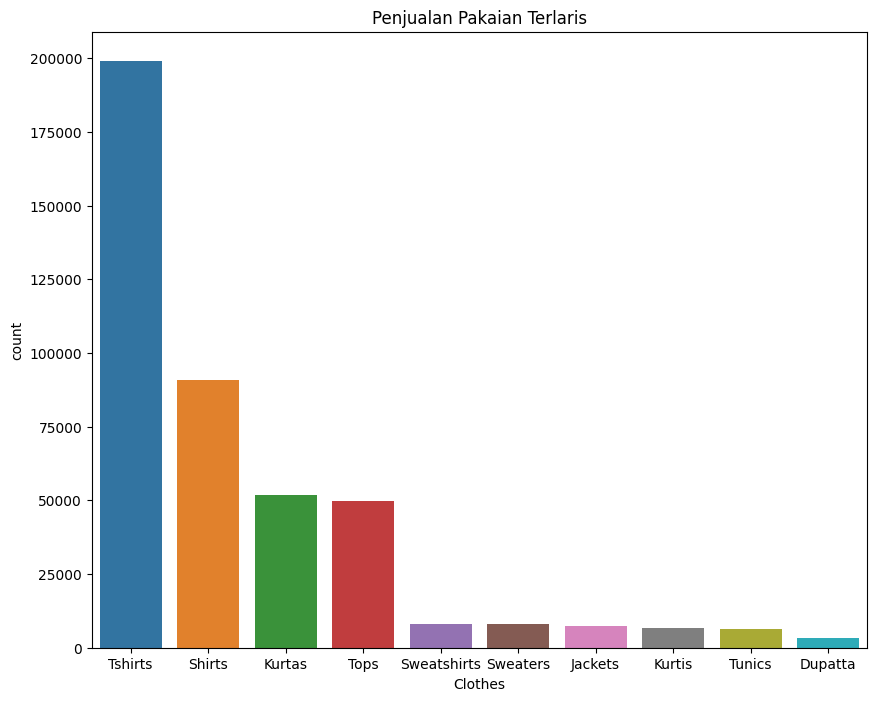

In [ ]:
# Jenis pakaian yang paling banyak diminati oleh customer

topwear = master_dataset[master_dataset['subCategory'] == 'Topwear']
topwear.rename(columns = {"articleType":"Clothes"},inplace=True)
plt.figure(figsize=(10,8))
sns.countplot(x = 'Clothes',
              data = topwear,
              order = topwear['Clothes'].value_counts()[:10].index)
plt.title('Penjualan Pakaian Terlaris')

In [ ]:
# Melihat pembagian jumlah produk berdasarkan payment_status
product_counts = master_dataset['payment_status'].value_counts(dropna=False)

# Menampilkan hasilnya
print("Pembagian jumlah produk berdasarkan payment_status:")
print(product_counts)

Pembagian jumlah produk berdasarkan payment_status:
Success    1201035
Failed       53550
unknown      49295
Name: payment_status, dtype: int64


In [ ]:
# Melihat pembagian jumlah produk berdasarkan payment_status
product_counts = df_transactions['payment_status'].value_counts(dropna=False)

# Menampilkan hasilnya
print("Pembagian jumlah produk berdasarkan payment_status:")
print(product_counts)

Pembagian jumlah produk berdasarkan payment_status:
Success    1201035
Failed       53550
Name: payment_status, dtype: int64


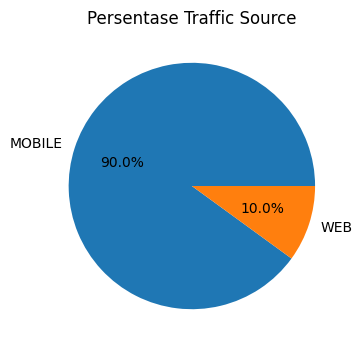

In [ ]:
plt.figure(figsize=(6,4))
plt.pie(df_clickstream["traffic_source"].value_counts(),
        autopct="%1.1f%%",
        labels=df_clickstream['traffic_source'].value_counts().index)
plt.title("Persentase Traffic Source")
plt.show()

Jumlah customer yang melakukan transaksi: 50242
Jumlah customer yang tidak melakukan transaksi: 49758


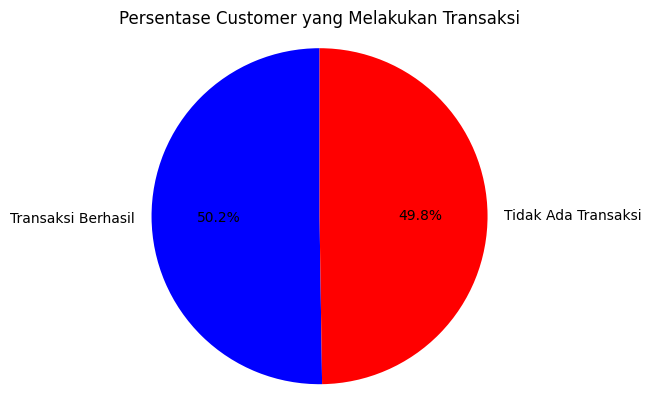

In [ ]:
merged_df = df_customer.merge(df_transactions2, on='customer_id', how='left')

customer_success = df_transactions2[df_transactions2['payment_status'] == 'Success']['customer_id'].nunique()
customer_failed = df_customer['customer_id'].nunique() - customer_success

# Tampilkan hasil
print(f"Jumlah customer yang melakukan transaksi: {customer_success}")
print(f"Jumlah customer yang tidak melakukan transaksi: {customer_failed}")

labels = ['Transaksi Berhasil', 'Tidak Ada Transaksi']
sizes = [customer_success, customer_failed]
colors = ['blue','red']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Persentase Customer yang Melakukan Transaksi')
plt.show()

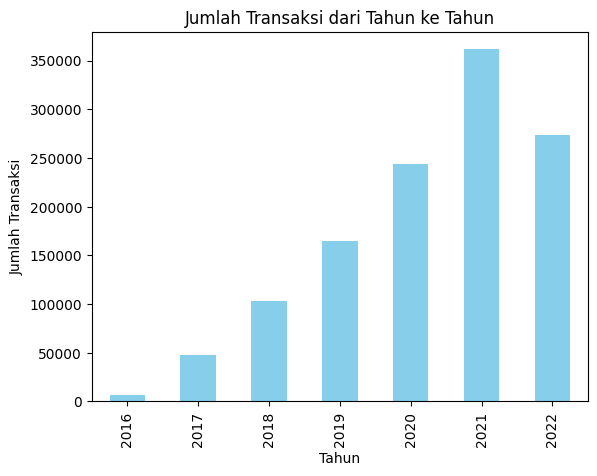

In [ ]:
# Konversi kolom 'created_at' menjadi tipe data datetime
df_transactions['created_at'] = pd.to_datetime(df_transactions['created_at'])

df_transactions_success = df_transactions[df_transactions['payment_status'] == 'Success']

transaction_years = df_transactions_success['created_at'].dt.year

transaction_years.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi dari Tahun ke Tahun')
plt.show()

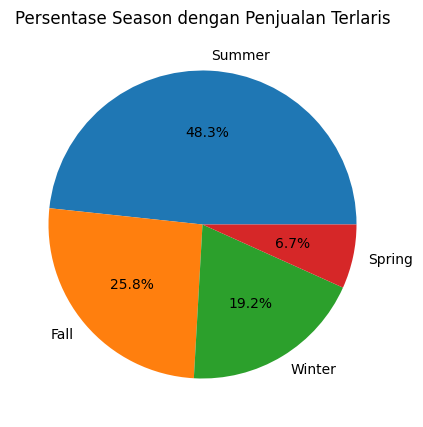

In [ ]:
success = df_transactions.copy()
success = df_transactions[df_transactions['payment_status'] == 'Success']

product_transactions = success.merge(df_product, how='left', on='product_id') # merge column transactions dan products
season = product_transactions.groupby('season')['quantity'].sum()
plt.figure(figsize=(7,5))
plt.pie(season.sort_values(ascending=False),
        autopct="%1.1f%%",
        labels=season.sort_values(ascending=False).index)
plt.title("Persentase Season dengan Penjualan Terlaris")
plt.show()

<ipython-input-89-dece594550b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_success['total_revenue'] = df_transactions_success['item_price'] * df_transactions_success['quantity']
<ipython-input-89-dece594550b6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_success['Year'] = df_transactions_success['created_at'].dt.year
<ipython-input-89-dece594550b6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

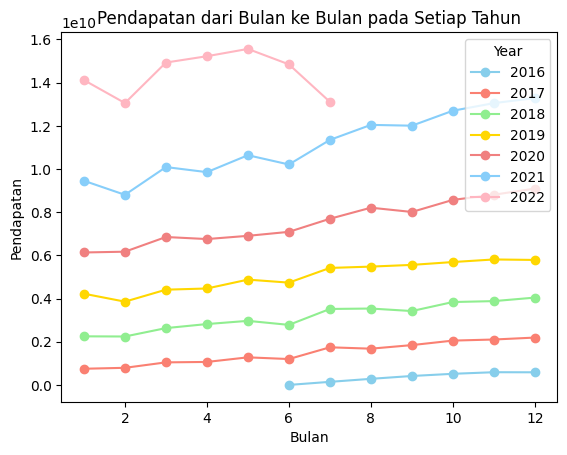

In [ ]:
# Filter berdasarkan payment_status 'Success'
df_transactions_success = df_transactions[df_transactions['payment_status'] == 'Success']

# Tambahkan kolom 'total_revenue' berdasarkan 'item_price' dan 'quantity'
df_transactions_success['total_revenue'] = df_transactions_success['item_price'] * df_transactions_success['quantity']

# Dapatkan tahun dan bulan dari kolom 'created_at'
df_transactions_success['Year'] = df_transactions_success['created_at'].dt.year
df_transactions_success['Month'] = df_transactions_success['created_at'].dt.month

# Mengelompokkan data transaksi berdasarkan bulan dan tahun
revenue_data = df_transactions_success.groupby(['Month', 'Year'])['total_revenue'].sum().unstack()

# Membuat visualisasi dengan diagram garis
revenue_data.plot(kind='line', marker='o', color=['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'lightskyblue', 'lightpink', 'lightgreen', 'lightyellow', 'lightsalmon', 'lightcyan', 'lightgrey'])
plt.xlabel('Bulan')
plt.ylabel('Pendapatan')
plt.title('Pendapatan dari Bulan ke Bulan pada Setiap Tahun')
plt.show()

In [ ]:
master_dataset['created_at'] = pd.to_datetime(master_dataset['created_at'], errors='coerce')

# Hapus baris dengan tanggal yang tidak valid
master_dataset = master_dataset.dropna(subset=['created_at'])

# Filter DataFrame untuk transaksi dengan 'payment_status' 'Success'
master_dataset_success = master_dataset[master_dataset['payment_status'] == 'Success']

# Ekstrak tahun dan bulan dari 'created_at'
master_dataset_success['Year'] = master_dataset_success['created_at'].dt.year
master_dataset_success['Month'] = master_dataset_success['created_at'].dt.month

# Filter hanya untuk tahun 2022 dan bulan 7
master_dataset_success_july_2022 = master_dataset_success[
    (master_dataset_success['Year'] == 2022) & (master_dataset_success['Month'] == 7)
]

# Hitung jumlah warna terjual untuk setiap bulan pada setiap tahun
color_quantity_data = master_dataset_success_july_2022.groupby(['Year', 'baseColour', 'masterCategory'])['quantity'].sum().reset_index()

# Pilih 10 warna teratas berdasarkan jumlah penjualan tertinggi
top_colors = color_quantity_data.groupby('baseColour')['quantity'].sum().nlargest(10).index

# Filter data hanya untuk 10 warna teratas
top_colors_data = color_quantity_data[color_quantity_data['baseColour'].isin(top_colors)]

# Hitung jumlah penjualan untuk setiap kombinasi warna dan kategori utama
color_category_data = top_colors_data.groupby(['Year', 'baseColour', 'masterCategory'])['quantity'].sum().unstack()

print("\nJumlah Warna Terjual Berdasarkan Bulan, Warna, dan Kategori Utama (Tahun 2022, Bulan 7):")
print(color_category_data)

<ipython-input-8-04c9df393702>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataset_success['Year'] = master_dataset_success['created_at'].dt.year
<ipython-input-8-04c9df393702>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataset_success['Month'] = master_dataset_success['created_at'].dt.month



Jumlah Warna Terjual Berdasarkan Bulan, Warna, dan Kategori Utama (Tahun 2022, Bulan 7):
masterCategory   Accessories  Apparel  Footwear  Free Items  Personal Care  \
Year baseColour                                                              
2022 Black            3851.0   3643.0    3590.0        47.0          324.0   
     Blue              820.0   3933.0     622.0        17.0          233.0   
     Brown            1683.0    681.0    1533.0         2.0          282.0   
     Green             409.0   1817.0     220.0         2.0          195.0   
     Grey              608.0   1919.0     644.0         3.0           65.0   
     Navy Blue         252.0   1444.0     354.0         NaN           14.0   
     Pink              322.0   1357.0     161.0         3.0          337.0   
     Purple            450.0   1123.0     155.0         3.0          145.0   
     Red               618.0   1735.0     454.0        10.0          200.0   
     White            1226.0   3159.0    1888.0     

In [ ]:
master_dataset['created_at'] = pd.to_datetime(master_dataset['created_at'], errors='coerce')

# Hapus baris dengan tanggal yang tidak valid
master_dataset = master_dataset.dropna(subset=['created_at'])

# Filter DataFrame untuk transaksi dengan 'payment_status' 'Success'
master_dataset_success = master_dataset[master_dataset['payment_status'] == 'Success']

# Ekstrak tahun dan bulan dari 'created_at'
master_dataset_success['Year'] = master_dataset_success['created_at'].dt.year
master_dataset_success['Month'] = master_dataset_success['created_at'].dt.month

# Filter hanya untuk tahun 2022 dan bulan 7
master_dataset_success_july_2022 = master_dataset_success[
    (master_dataset_success['Year'] == 2022) & (master_dataset_success['Month'] == 7)
]

# Hitung jumlah warna terjual untuk setiap bulan pada setiap tahun
color_quantity_data = master_dataset_success_july_2022.groupby(['Year', 'baseColour'])['quantity'].sum().reset_index()

# Pilih 10 warna teratas berdasarkan jumlah penjualan tertinggi
top_colors = color_quantity_data.groupby('baseColour')['quantity'].sum().nlargest(10).index

# Filter data hanya untuk 10 warna teratas
top_colors_data = color_quantity_data[color_quantity_data['baseColour'].isin(top_colors)]

# Hitung jumlah penjualan untuk setiap kombinasi warna dan kategori utama
color_data = top_colors_data.groupby(['Year', 'baseColour'])['quantity'].sum().unstack()

print("\nJumlah Warna Terjual Berdasarkan Bulan, Warna (Tahun 2022, Bulan 7):")
print(color_data)

<ipython-input-9-cf4ec900f1f9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataset_success['Year'] = master_dataset_success['created_at'].dt.year
<ipython-input-9-cf4ec900f1f9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataset_success['Month'] = master_dataset_success['created_at'].dt.month



Jumlah Warna Terjual Berdasarkan Bulan, Warna (Tahun 2022, Bulan 7):
baseColour    Black    Blue   Brown   Green    Grey  Navy Blue    Pink  \
Year                                                                     
2022        11458.0  5632.0  4188.0  2643.0  3239.0     2064.0  2180.0   

baseColour  Purple     Red   White  
Year                                
2022        1876.0  3018.0  6571.0  



### **2.4.5 Cek Outlier dan Handling**




         customer_id session_id product_id created_at  quantity  item_price  \
2                NaN        NaN        NaN        NaT       NaN         NaN   
3                NaN        NaN        NaN        NaT       NaN         NaN   
4                NaN        NaN        NaN        NaT       NaN         NaN   
5                NaN        NaN        NaN        NaT       NaN         NaN   
6                NaN        NaN        NaN        NaT       NaN         NaN   
...              ...        ...        ...        ...       ...         ...   
1303875          NaN        NaN        NaN        NaT       NaN         NaN   
1303876          NaN        NaN        NaN        NaT       NaN         NaN   
1303877          NaN        NaN        NaN        NaT       NaN         NaN   
1303878          NaN        NaN        NaN        NaT       NaN         NaN   
1303879          NaN        NaN        NaN        NaT       NaN         NaN   

        booking_id payment_method payment_status pr

<function matplotlib.pyplot.show(close=None, block=None)>

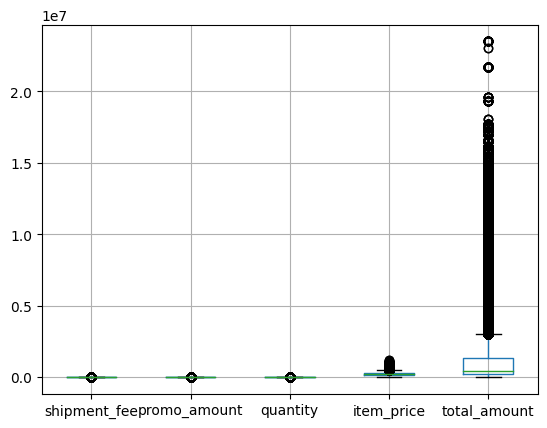

In [ ]:
# Pilih kolom tertentu
selected_column = ['shipment_fee', 'promo_amount', 'item_price', 'total_amount']

Q1 = master_dataset[selected_column].quantile(0.25)
Q3 = master_dataset[selected_column].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas untuk menentukan outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cetak baris yang berisi outlier
print(master_dataset[(master_dataset[selected_column] < lower_bound) | (master_dataset[selected_column] > upper_bound)])

import matplotlib.pyplot as plt

# Pilih kolom tertentu
selected_column = ['shipment_fee', 'promo_amount', 'quantity', 'item_price', 'total_amount']

# Buat box plot untuk kolom tertentu dalam DataFrame
master_dataset.boxplot(column=selected_column)

# Tampilkan plot
plt.show

In [ ]:
# Handling Outliers
num_col_outliers = ['shipment_fee', 'promo_amount', 'item_price', 'total_amount']
for feature in num_col_outliers:
    q1 = master_dataset[feature].quantile(0.25)
    q3 = master_dataset[feature].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    master_dataset.loc[master_dataset[feature]<lower_limit, feature] = lower_limit
    master_dataset.loc[master_dataset[feature]>upper_limit, feature] = upper_limit

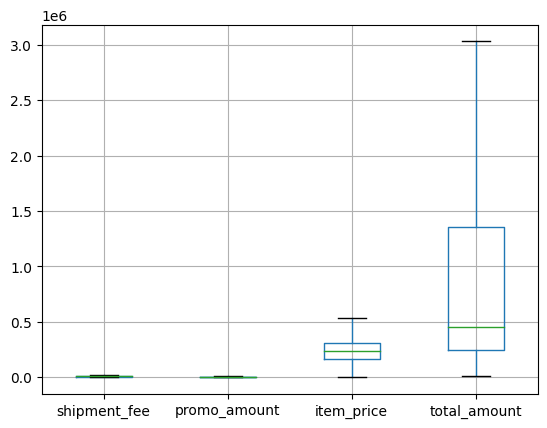

In [ ]:
# Pilih kolom tertentu
selected_column = ['shipment_fee', 'promo_amount','item_price', 'total_amount']

# Buat box plot untuk kolom tertentu dalam DataFrame
master_dataset.boxplot(column=selected_column)

# Tampilkan plot
plt.show()

### **2.4.5 Cek Duplicate**

In [ ]:
duplicate_rows = master_dataset.duplicated()
num_duplicates = duplicate_rows.sum()

print(f"Jumlah duplikat dalam DataFrame: {num_duplicates}")

Jumlah duplikat dalam DataFrame: 0


# **3. Feature Engineering**

## **3.1 Feature Dataset**

### **3.1.1 Label Quarter**


In [ ]:
df_feature = master_dataset.copy()

In [ ]:
master_dataset = master_dataset.rename(columns={'created_at': 'date'})

In [ ]:
df_feature['date'] = pd.to_datetime(df_feature['date'], errors='coerce')

# Extract year and month from 'date'
df_feature['year'] = df_feature['date'].dt.year

# Membagi setiap tahun menjadi quartile berdasarkan bulan
df_feature['quarter'] = df_feature['date'].dt.month.apply(lambda x: (x-1) // 3 + 1)

# Mengganti nama kolom 'year' yang akan ditambahkan
df_feature['year_trans'] = df_feature['year']

# Mengelompokkan data berdasarkan 'year_trans', 'masterCategory', dan 'quarter'
result = df_feature.groupby(['year_trans', 'masterCategory', 'quarter'])

# Menampilkan hasil
print(result)

In [ ]:
df_feature.head()

,customer_id,session_id,product_id,date,quantity,item_price,booking_id,payment_method,payment_status,promo_code,...,gender_y,masterCategory,subCategory,articleType,usage,baseColour,year,season,quarter,year_trans
2,7279,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,18015.0,2020-08-23 12:53:12.916342,1.0,305982.0,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,LinkAja,Success,WEEKENDSERU,...,Women,Accessories,Belts,Belts,Casual,Brown,2020,Winter,3,2020
3,7279,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,2401.0,2020-08-23 12:53:12.916342,2.0,263311.0,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,LinkAja,Success,WEEKENDSERU,...,Men,Apparel,Topwear,Tshirts,Sports,White,2020,Fall,3,2020
4,7279,82396d8d-7d8a-436d-8e14-75f24aa35faa,12449.0,2020-08-31 13:34:59.916342,1.0,381341.0,eed52035-1f80-422c-b0ac-a1c814e77bcf,LinkAja,Success,unknown,...,Unisex,Accessories,Shoe Accessories,Shoe Accessories,unknown,Brown,2020,Fall,3,2020
5,7279,348cc997-480b-467e-a502-1eed0f611e9d,25820.0,2020-09-08 13:38:30.916342,1.0,154220.0,af568d06-c819-4ab4-a3e8-06857786ba10,LinkAja,Success,unknown,...,Women,Apparel,Topwear,Kurtas,Ethnic,Cream,2020,Summer,3,2020
6,7279,70d1c010-60e4-440a-80df-9efb0132cfb7,25157.0,2020-09-16 13:48:09.916342,1.0,247557.0,d8c8337c-ef09-4ed3-801a-3e5fd22c3d8d,Debit Card,Success,unknown,...,Women,Accessories,Bags,Handbags,Casual,Black,2020,Winter,3,2020


In [ ]:
master_dataset['date'] = pd.to_datetime(master_dataset['date'], errors='coerce')

# Filter DataFrame untuk transaksi dengan payment_status 'Success' dan tahun bukan 2016 atau 2022
success_transactions = master_dataset[(master_dataset['payment_status'] == 'Success') & (~master_dataset['date'].dt.year.isin([2016, 2022]))]

# Ekstrak Quarter dari kolom 'date'
success_transactions['quarter'] = success_transactions['date'].dt.quarter

# Hitung jumlah quantity berdasarkan Quarter dan urutkan
quantity_by_quarter = success_transactions.groupby('quarter')['quantity'].sum().sort_values(ascending=False)

# Hitung total quantity
total_quantity = quantity_by_quarter.sum()

# Hitung persentase quantity berdasarkan Quarter
percentage_by_quarter = (quantity_by_quarter / total_quantity) * 100

# Tampilkan hasil
print("Jumlah Quantity berdasarkan Quarter (payment_status = Success), diurutkan:")
print(quantity_by_quarter)

print("\nPersentase Quantity berdasarkan Quarter (payment_status = Success):")
print(percentage_by_quarter)

Jumlah Quantity berdasarkan Quarter (payment_status = Success), diurutkan:
quarter
4    403498.0
3    365987.0
2    311396.0
1    279033.0
Name: quantity, dtype: float64

Persentase Quantity berdasarkan Quarter (payment_status = Success):
quarter
4    29.670847
3    26.912511
2    22.898213
1    20.518430
Name: quantity, dtype: float64


<ipython-input-70-7ad8bfc0c3af>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_transactions['quarter'] = success_transactions['date'].dt.quarter


### **3.1.2 Dominasi Master Category**


In [ ]:
df_feature['dominasi_pen_masterCategory'] = df_feature['masterCategory'].map({'Apparel': 1, 'Accessories': 1, 'Footwear': 1,
                                           'Personal Care': 0, 'Free Items': 0, 'Sporting Goods': 0,'Home':0.})

In [ ]:
df_feature.info()

### **3.1.3 Label Promo**

In [ ]:
# Menambahkan kolom 'label' berdasarkan penggunaan promo atau tidak
df_feature['label_penggunaan_promo'] = df_feature['promo_amount'].apply(lambda x: 1 if x > 0 else 0)

# Menampilkan hanya kolom yang ingin ditambahkan
result = df_feature.loc[:, ['promo_amount', 'label_penggunaan_promo']]

In [ ]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 2 to 1303879
Data columns (total 29 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   customer_id                  1254585 non-null  int64         
 1   session_id                   1254585 non-null  object        
 2   product_id                   1254585 non-null  object        
 3   date                         1254585 non-null  datetime64[ns]
 4   quantity                     1254585 non-null  float64       
 5   item_price                   1254585 non-null  float64       
 6   booking_id                   1254585 non-null  object        
 7   payment_method               1254585 non-null  object        
 8   payment_status               1254585 non-null  object        
 9   promo_code                   1254585 non-null  object        
 10  promo_amount                 1254585 non-null  float64       
 11  shipment_fe


### **3.1.4 Total Pendapatan**

In [ ]:
df_feature['total_income'] = df_feature.apply(lambda row: row['quantity'] * row['item_price'] if row['payment_status'] == 'Success' else 0, axis=1)

In [ ]:
df_feature.head()

,customer_id,session_id,product_id,date,quantity,item_price,booking_id,payment_method,payment_status,promo_code,...,articleType,usage,baseColour,year,season,quarter,year_trans,dominasi_pen_masterCategory,label_penggunaan_promo,total_income
2,7279,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,18015.0,2020-08-23 12:53:12.916342,1.0,305982.0,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,LinkAja,Success,WEEKENDSERU,...,Belts,Casual,Brown,2020,Winter,3,2020,1.0,1,305982.0
3,7279,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,2401.0,2020-08-23 12:53:12.916342,2.0,263311.0,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,LinkAja,Success,WEEKENDSERU,...,Tshirts,Sports,White,2020,Fall,3,2020,1.0,1,526622.0
4,7279,82396d8d-7d8a-436d-8e14-75f24aa35faa,12449.0,2020-08-31 13:34:59.916342,1.0,381341.0,eed52035-1f80-422c-b0ac-a1c814e77bcf,LinkAja,Success,unknown,...,Shoe Accessories,unknown,Brown,2020,Fall,3,2020,1.0,0,381341.0
5,7279,348cc997-480b-467e-a502-1eed0f611e9d,25820.0,2020-09-08 13:38:30.916342,1.0,154220.0,af568d06-c819-4ab4-a3e8-06857786ba10,LinkAja,Success,unknown,...,Kurtas,Ethnic,Cream,2020,Summer,3,2020,1.0,0,154220.0
6,7279,70d1c010-60e4-440a-80df-9efb0132cfb7,25157.0,2020-09-16 13:48:09.916342,1.0,247557.0,d8c8337c-ef09-4ed3-801a-3e5fd22c3d8d,Debit Card,Success,unknown,...,Handbags,Casual,Black,2020,Winter,3,2020,1.0,0,247557.0


### **3.1.5 Feature Aggregate**

In [ ]:
aggregated_features = df_feature.groupby('customer_id').agg({
    'shipment_fee': ['min', 'max', 'mean'],
    'item_price': ['min', 'max', 'mean'],
    'promo_amount': ['min', 'max', 'mean']
})

aggregated_features.columns = ['min_shipment', 'max_shipment', 'avg_shipment',
                               'min_item_price', 'max_item_price', 'avg_item_price',
                               'min_promo_amount', 'max_promo_amount', 'avg_promo_amount']

In [ ]:
df_feature = df_feature.merge(aggregated_features, on='customer_id', how='left')

In [ ]:
df_feature.head()

,customer_id,session_id,product_id,date,quantity,item_price,booking_id,payment_method,payment_status,promo_code,...,total_income,min_shipment,max_shipment,avg_shipment,min_item_price,max_item_price,avg_item_price,min_promo_amount,max_promo_amount,avg_promo_amount
0,7279,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,18015.0,2020-08-23 12:53:12.916342,1.0,305982.0,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,LinkAja,Success,WEEKENDSERU,...,305982.0,0.0,25000.0,8008.474576,41313.0,521677.0,238678.313559,0.0,9995.0,995.508475
1,7279,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,2401.0,2020-08-23 12:53:12.916342,2.0,263311.0,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,LinkAja,Success,WEEKENDSERU,...,526622.0,0.0,25000.0,8008.474576,41313.0,521677.0,238678.313559,0.0,9995.0,995.508475
2,7279,82396d8d-7d8a-436d-8e14-75f24aa35faa,12449.0,2020-08-31 13:34:59.916342,1.0,381341.0,eed52035-1f80-422c-b0ac-a1c814e77bcf,LinkAja,Success,unknown,...,381341.0,0.0,25000.0,8008.474576,41313.0,521677.0,238678.313559,0.0,9995.0,995.508475
3,7279,348cc997-480b-467e-a502-1eed0f611e9d,25820.0,2020-09-08 13:38:30.916342,1.0,154220.0,af568d06-c819-4ab4-a3e8-06857786ba10,LinkAja,Success,unknown,...,154220.0,0.0,25000.0,8008.474576,41313.0,521677.0,238678.313559,0.0,9995.0,995.508475
4,7279,70d1c010-60e4-440a-80df-9efb0132cfb7,25157.0,2020-09-16 13:48:09.916342,1.0,247557.0,d8c8337c-ef09-4ed3-801a-3e5fd22c3d8d,Debit Card,Success,unknown,...,247557.0,0.0,25000.0,8008.474576,41313.0,521677.0,238678.313559,0.0,9995.0,995.508475


### **3.1.6 Quantity Failed dan Total Sale (Target)**


In [ ]:
df_feature['date'] = pd.to_datetime(df_feature['date'])

df_feature['quantity_failed'] = 0
df_feature['total_sale'] = 0

failed_mask = (df_feature['payment_status'] == 'Failed')
success_mask = (df_feature['payment_status'] == 'Success')

df_feature.loc[failed_mask, 'quantity_failed'] = df_feature.loc[failed_mask, 'quantity']
df_feature.loc[success_mask, 'total_sale'] = df_feature.loc[success_mask, 'quantity']


In [ ]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 41 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   customer_id                  1254585 non-null  int64         
 1   session_id                   1254585 non-null  object        
 2   product_id                   1254585 non-null  object        
 3   date                         1254585 non-null  datetime64[ns]
 4   quantity                     1254585 non-null  float64       
 5   item_price                   1254585 non-null  float64       
 6   booking_id                   1254585 non-null  object        
 7   payment_method               1254585 non-null  object        
 8   payment_status               1254585 non-null  object        
 9   promo_code                   1254585 non-null  object        
 10  promo_amount                 1254585 non-null  float64       
 11  shipment_fe

### **3.1.7 Feature Holiday**

In [ ]:
import pandas as pd
from datetime import datetime
import holidays

# Mengonversi kolom 'created_at' ke tipe data datetime
df_feature['date'] = pd.to_datetime(df_feature['date'], errors='coerce')

# Mendefinisikan libur nasional di Indonesia
indonesia_holidays = holidays.Indonesia()

# Menambahkan kolom 'is_holiday'
df_feature['is_holiday'] = df_feature['date'].apply(lambda x: x in indonesia_holidays if not pd.isnull(x) else False)

In [ ]:
import pandas as pd
from datetime import datetime
import holidays

# Mengonversi kolom 'created_at' ke tipe data datetime
df_feature['date'] = pd.to_datetime(df_feature['date'], errors='coerce')

# Mendefinisikan libur nasional di Indonesia
indonesia_holidays = holidays.Indonesia()

# Menambahkan kolom 'is_holiday'
df_feature['holiday'] = df_feature['date'].apply(lambda x: indonesia_holidays.get(x) if not pd.isnull(x) else None)

In [ ]:
success_transactions = df_feature[df_feature['payment_status'] == 'Success']

# Hitung jumlah quantity berdasarkan 'holiday'
quantity_by_holiday = success_transactions.groupby('holiday')['quantity'].sum()

# Tampilkan hasil
print("Jumlah Quantity berdasarkan 'holiday' (payment_status = Success):")
print(quantity_by_holiday)

Jumlah Quantity berdasarkan 'holiday' (payment_status = Success):
holiday
Ascension Day                 3799.0
Ascension Day; Eid al-Fitr    1234.0
Buddha's Birthday             5933.0
Christmas Day                 4636.0
Day of Silence                5017.0
Eid al-Adha                   5783.0
Eid al-Fitr                   4377.0
Eid al-Fitr Second Day        5180.0
Election Day                  1937.0
Good Friday                   5078.0
Independence Day              3902.0
International Labor Day       5502.0
Islamic New Year              5261.0
Lunar New Year                4958.0
New Year's Day                4482.0
Pancasila Day                 5312.0
The Prophet's Ascension       5342.0
The Prophet's Birthday        4538.0
Name: quantity, dtype: float64


## **3.2 Data Cleaning**

In [ ]:
df_finaldata = df_feature.copy()

In [ ]:
df_finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 43 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   customer_id                  1254585 non-null  int64         
 1   session_id                   1254585 non-null  object        
 2   product_id                   1254585 non-null  object        
 3   date                         1254585 non-null  datetime64[ns]
 4   quantity                     1254585 non-null  float64       
 5   item_price                   1254585 non-null  float64       
 6   booking_id                   1254585 non-null  object        
 7   payment_method               1254585 non-null  object        
 8   payment_status               1254585 non-null  object        
 9   promo_code                   1254585 non-null  object        
 10  promo_amount                 1254585 non-null  float64       
 11  shipment_fe

In [ ]:
df_finaldata = df_finaldata.rename(columns={'label_penggunaan_promo': 'label_promo', 'gender_y': 'gender_product', 'date': 'date_trans'})

In [ ]:
cols_to_drop = ['session_id', 'year','booking_id','gender_x', 'birthdate', 'home_location', 'home_country']
df_finaldata = df_finaldata.drop(cols_to_drop, axis=1)

In [ ]:
cols_to_drop = ['is_holiday']
df_finaldata = df_finaldata.drop(cols_to_drop, axis=1)

In [ ]:
df_finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   customer_id                  1254585 non-null  int64         
 1   product_id                   1254585 non-null  object        
 2   date_trans                   1254585 non-null  datetime64[ns]
 3   quantity                     1254585 non-null  float64       
 4   item_price                   1254585 non-null  float64       
 5   payment_method               1254585 non-null  object        
 6   payment_status               1254585 non-null  object        
 7   promo_code                   1254585 non-null  object        
 8   promo_amount                 1254585 non-null  float64       
 9   shipment_fee                 1254585 non-null  float64       
 10  total_amount                 1254585 non-null  float64       
 11  gender_prod

In [ ]:
df_finaldata.isna().sum()

customer_id                          0
product_id                           0
date_trans                           0
quantity                             0
item_price                           0
payment_method                       0
payment_status                       0
promo_code                           0
promo_amount                         0
shipment_fee                         0
total_amount                         0
gender_product                       0
masterCategory                       0
subCategory                          0
articleType                          0
usage                                0
baseColour                           0
season                               0
quarter                              0
year_trans                           0
dominasi_pen_masterCategory          0
label_promo                          0
total_income                         0
min_shipment                         0
max_shipment                         0
avg_shipment             

In [ ]:
# Mengisi nilai NaN dengan 'Not Holiday'
df_finaldata['holiday'].fillna('Not Holiday', inplace=True)

In [ ]:
df_finaldata.isna().sum()

customer_id                    0
product_id                     0
date_trans                     0
quantity                       0
item_price                     0
payment_method                 0
payment_status                 0
promo_code                     0
promo_amount                   0
shipment_fee                   0
total_amount                   0
gender_product                 0
masterCategory                 0
subCategory                    0
articleType                    0
usage                          0
baseColour                     0
season                         0
quarter                        0
year_trans                     0
dominasi_pen_masterCategory    0
label_promo                    0
total_income                   0
min_shipment                   0
max_shipment                   0
avg_shipment                   0
min_item_price                 0
max_item_price                 0
avg_item_price                 0
min_promo_amount               0
max_promo_

In [ ]:
duplicate_rows = df_finaldata.duplicated()
num_duplicates = duplicate_rows.sum()

print(f"Jumlah duplikat dalam DataFrame: {num_duplicates}")

Jumlah duplikat dalam DataFrame: 0


In [ ]:
df_finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   customer_id                  1254585 non-null  int64         
 1   product_id                   1254585 non-null  object        
 2   date_trans                   1254585 non-null  datetime64[ns]
 3   quantity                     1254585 non-null  float64       
 4   item_price                   1254585 non-null  float64       
 5   payment_method               1254585 non-null  object        
 6   payment_status               1254585 non-null  object        
 7   promo_code                   1254585 non-null  object        
 8   promo_amount                 1254585 non-null  float64       
 9   shipment_fee                 1254585 non-null  float64       
 10  total_amount                 1254585 non-null  float64       
 11  gender_prod

In [ ]:
df_finaldata.to_csv('/content/drive/MyDrive/df_finallengkappppp.csv', index=False)

## **3.3 Data Visualization**

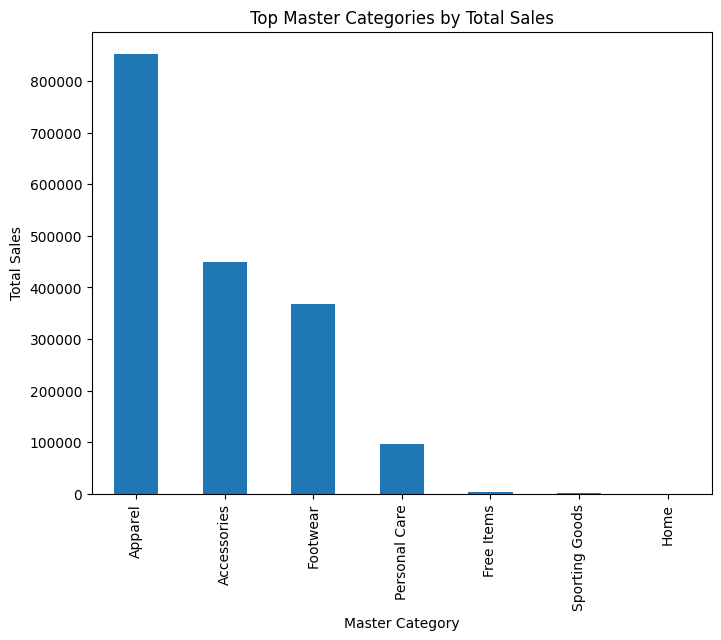

In [ ]:
top_categories = df_final.groupby('masterCategory')['total_sale'].sum().sort_values(ascending=False)

top_categories.plot(kind='bar', figsize=(8, 6))
plt.title('Top Master Categories by Total Sales')
plt.xlabel('Master Category')
plt.ylabel('Total Sales')
plt.show()

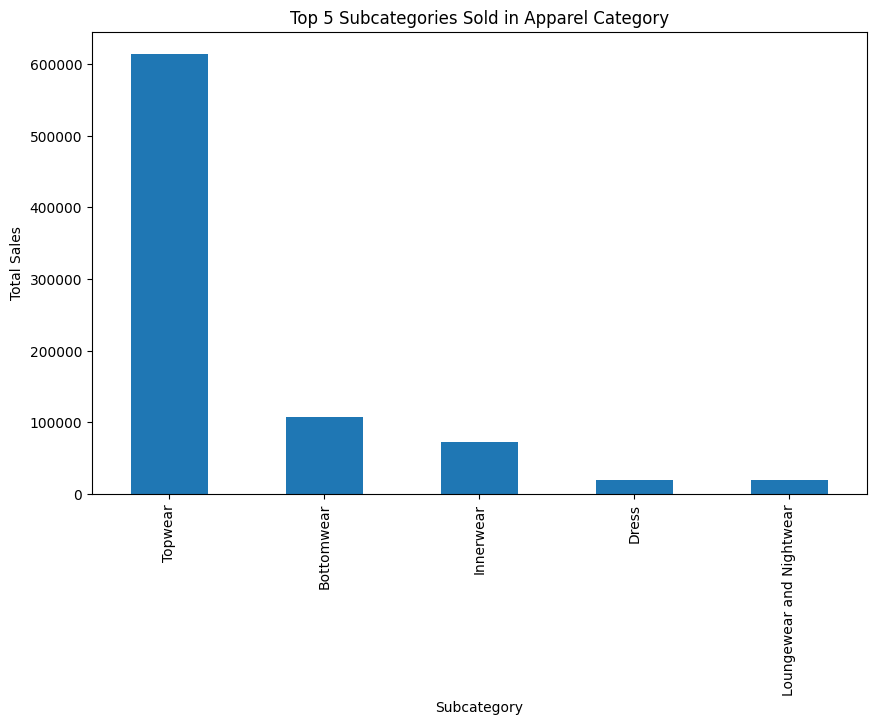

In [ ]:
top_subcategories = df_final[df_final['masterCategory'] == 'Apparel'].groupby('subCategory')['total_sale'].sum().nlargest(5)

top_subcategories.plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Subcategories Sold in Apparel Category')
plt.xlabel('Subcategory')
plt.ylabel('Total Sales')
plt.show()

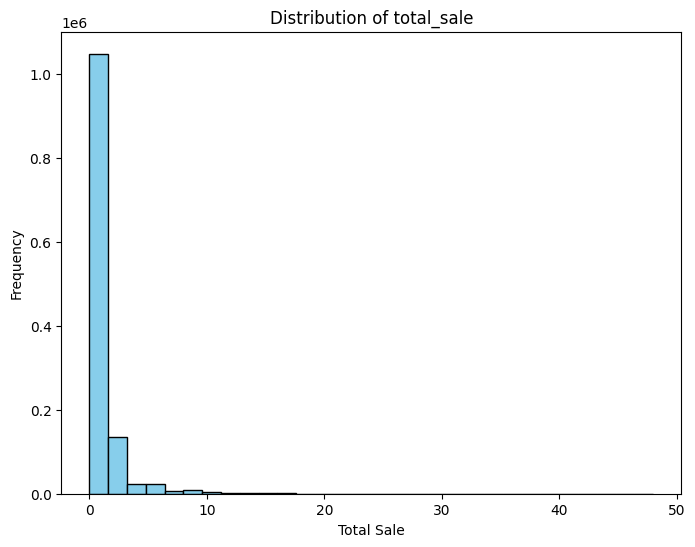

In [ ]:
# Membuat histogram untuk melihat distribusi data
plt.figure(figsize=(8,6))
plt.hist(df_final['total_sale'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of total_sale')
plt.xlabel('Total Sale')
plt.ylabel('Frequency')
plt.show()

## **3.4 Encoding**

In [ ]:
df_final.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_final['payment_method'] = label_encoder.fit_transform(df_final['payment_method'])
df_final['payment_status'] = label_encoder.fit_transform(df_final['payment_status'])
df_final['promo_code'] = label_encoder.fit_transform(df_final['promo_code'])
df_final['gender_product'] = label_encoder.fit_transform(df_final['gender_product'])
df_final['masterCategory'] = label_encoder.fit_transform(df_final['masterCategory'])
df_final['subCategory'] = label_encoder.fit_transform(df_final['subCategory'])
df_final['articleType'] = label_encoder.fit_transform(df_final['articleType'])
df_final['usage'] = label_encoder.fit_transform(df_final['usage'])
df_final['baseColour'] = label_encoder.fit_transform(df_final['baseColour'])
df_final['season'] = label_encoder.fit_transform(df_final['season'])



In [ ]:
df_final.info()

## **3.5 Split Data**

In [ ]:
value_counts = df_final['masterCategory'].value_counts()
value_counts

In [ ]:
#df_home = df_final[df_final['masterCategory'] == 4]
#df_final3= df_final[df_final['year_trans'] 2022 => 2016]


In [ ]:
data_final = df_final[(df_final['year_trans'] >= 2021) & (df_final['year_trans'] <= 2022)]
#df_final3 = df_final[(df_final['year_trans'] >= 2017) & (df_final['year_trans'] <= 2021)]
#data_2022 = df_final[df_final['year_trans'] == 2022]

In [ ]:
#df_final4 = df_final[(df_final['year_trans'] >= 2021)]

In [ ]:
#df_final4.to_csv('/content/drive/MyDrive/df_final4.csv', index=False)

In [ ]:
# Mendownload DataFrame df_final2
#df_home.to_csv('/content/drive/MyDrive/df_home.csv', index=False)
#df_final2.to_csv('/content/drive/MyDrive/df_final2.csv', index=False)

# Mendownload DataFrame df_final1
#df_final1.to_csv('/content/drive/MyDrive/df_final1.csv', index=False)

In [ ]:
data_final.to_csv('/content/drive/MyDrive/data_final.csv', index=False)

In [ ]:
df_final.head()

In [ ]:
df_final.info()

## **3.6 Stationarity Testing**

In [ ]:
# Read Dataset
df_final = pd.read_csv('/content/drive/MyDrive/data_final.csv')

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663131 entries, 0 to 663130
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   customer_id                  663131 non-null  int64  
 1   product_id                   663131 non-null  float64
 2   date_trans                   663131 non-null  object 
 3   quantity                     663131 non-null  float64
 4   item_price                   663131 non-null  float64
 5   payment_method               663131 non-null  object 
 6   payment_status               663131 non-null  object 
 7   promo_code                   663131 non-null  object 
 8   promo_amount                 663131 non-null  float64
 9   shipment_fee                 663131 non-null  float64
 10  total_amount                 663131 non-null  float64
 11  gender_product               663131 non-null  object 
 12  masterCategory               663131 non-null  object 
 13 

In [ ]:
from statsmodels.tsa.stattools import kpss
# Mengonversi kolom 'created_at' ke tipe data datetime
df_final['date_trans'] = pd.to_datetime(df_final['date_trans'], errors='coerce')
df_final.set_index('date_trans', inplace=True)

# Fungsi untuk melakukan uji KPSS
def kpss_test(timeseries):
    result = kpss(timeseries, regression='c', nlags='auto')
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[3])

# Melakukan uji KPSS pada seluruh kolom 'total_sale'
kpss_test(df_final['total_sale'])

KPSS Statistic: 0.3974586627938864
p-value: 0.07825057638194552
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


## **3.7 Feature Selection**

In [ ]:
df_final = pd.read_csv('/content/drive/MyDrive/df_finalfeature.csv')

<ipython-input-6-4d0295ed1c7f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat = df_final.corr()


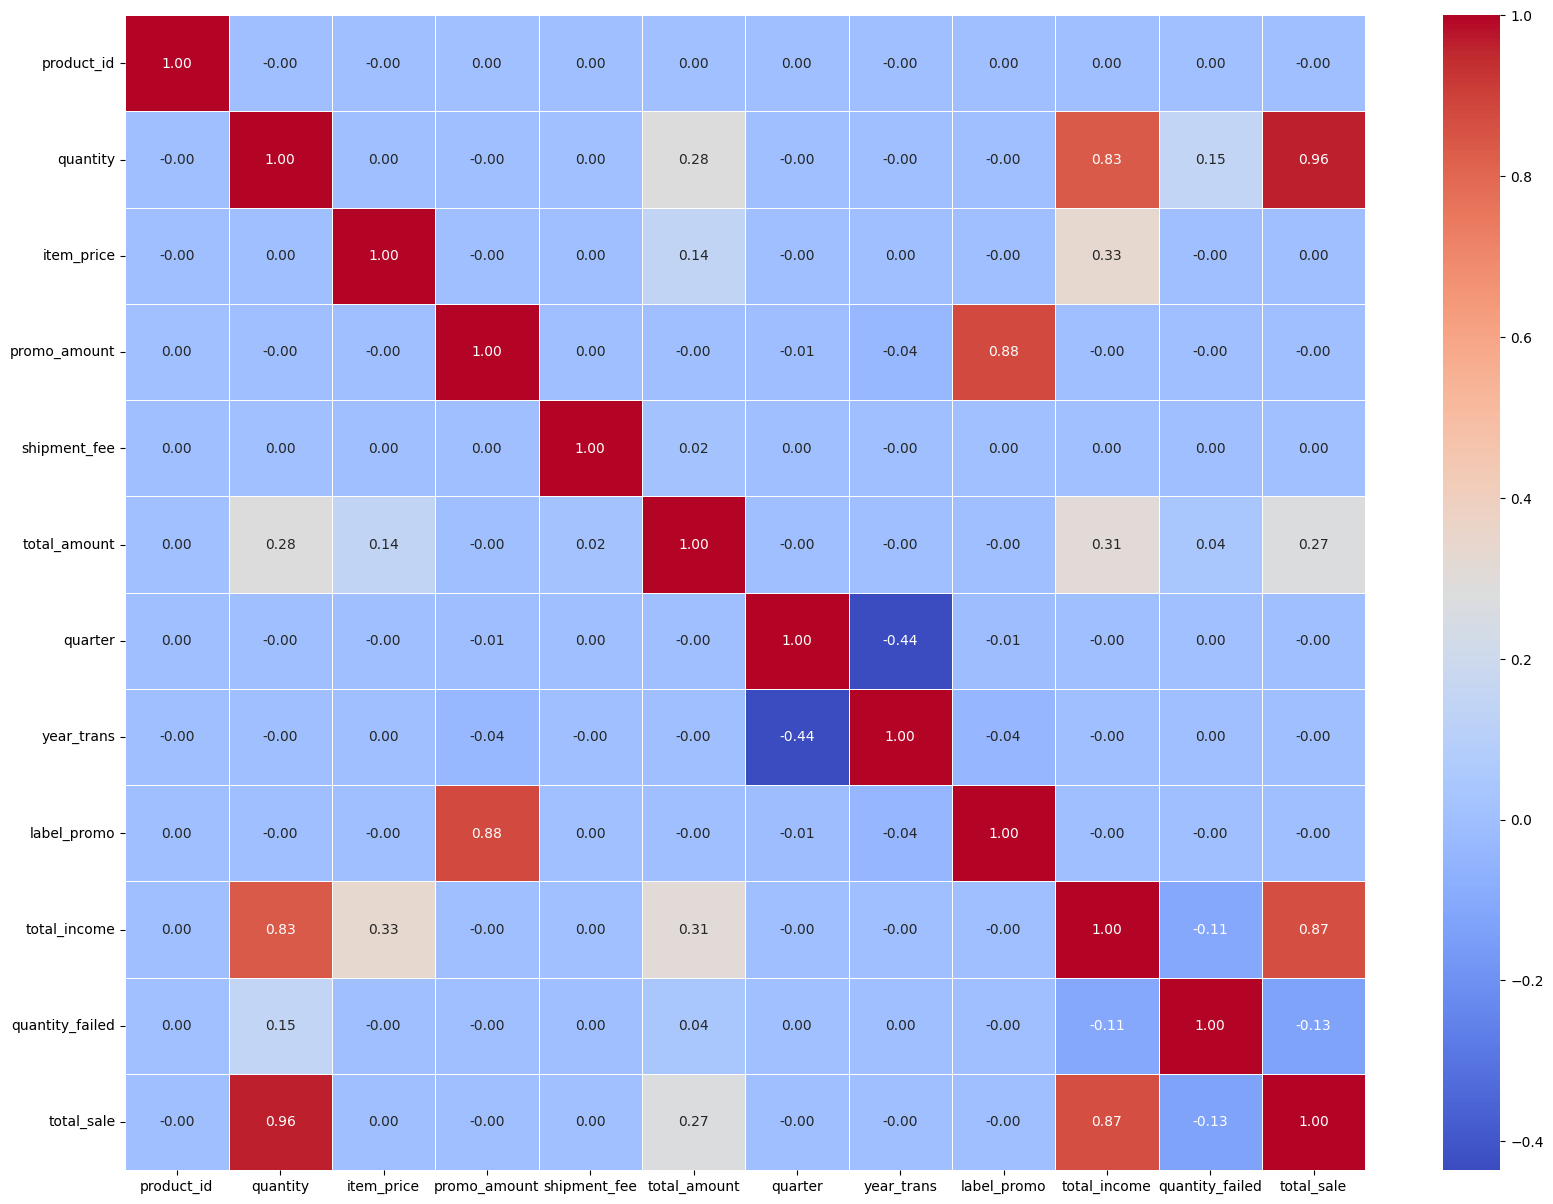

In [ ]:
f, ax = plt.subplots(figsize=(20, 15))
mat = df_final.corr()

sns.heatmap(mat, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.show()

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663131 entries, 0 to 663130
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   product_id       663131 non-null  float64
 1   date_trans       663131 non-null  object 
 2   quantity         663131 non-null  float64
 3   item_price       663131 non-null  float64
 4   promo_code       663131 non-null  object 
 5   promo_amount     663131 non-null  float64
 6   shipment_fee     663131 non-null  float64
 7   total_amount     663131 non-null  float64
 8   masterCategory   663131 non-null  object 
 9   subCategory      663131 non-null  object 
 10  month            663131 non-null  object 
 11  quarter          663131 non-null  float64
 12  year_trans       663131 non-null  float64
 13  label_promo      663131 non-null  int64  
 14  total_income     663131 non-null  float64
 15  quantity_failed  663131 non-null  int64  
 16  total_sale       663131 non-null  int6

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_final['masterCategory'] = label_encoder.fit_transform(df_final['masterCategory'])
df_final['subCategory'] = label_encoder.fit_transform(df_final['subCategory'])
df_final['promo_code'] = label_encoder.fit_transform(df_final['promo_code'])

In [ ]:
df_final.drop(columns=['date_trans'], inplace=True)

In [ ]:
df_final['month'] = pd.to_datetime(df_final['month'])

# **4. Machine Learning**

## **4.1 Model**

### **4.1.1 Simulasi**

In [ ]:
df_final = pd.read_csv('/content/drive/MyDrive/df_modelbaru.csv')

In [ ]:
df_final.head()

,product_id,quantity,item_price,promo_code,promo_amount,shipment_fee,total_amount,masterCategory,subCategory,month,quarter,year_trans,label_promo,total_income,quantity_failed,total_sale
0,24742.0,1.0,230822.0,1,7755.0,5000.0,228067.0,0,2,2021-01-31,1.0,2021.0,1,230822.0,0,1
1,57187.0,1.0,294674.0,8,0.0,10000.0,304674.0,1,38,2021-01-31,1.0,2021.0,0,294674.0,0,1
2,30976.0,2.0,253274.0,8,0.0,15000.0,521548.0,5,12,2021-01-31,1.0,2021.0,0,506548.0,0,2
3,43957.0,1.0,239819.0,8,0.0,0.0,239819.0,2,26,2021-01-31,1.0,2021.0,0,239819.0,0,1
4,33690.0,1.0,271688.0,8,0.0,10000.0,281688.0,2,30,2021-01-31,1.0,2021.0,0,271688.0,0,1


In [ ]:
columns_to_drop = ['Year','Month']

df_final.drop(columns=columns_to_drop, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_final['masterCategory'] = label_encoder.fit_transform(df_final['masterCategory'])
df_final['subCategory'] = label_encoder.fit_transform(df_final['subCategory'])
df_final['promo_code'] = label_encoder.fit_transform(df_final['promo_code'])

In [ ]:
df_final.drop(columns=['date_trans'], inplace=True)

**Model XGBoost**

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


train = df_final[(df_final['month'] <= '2022-01-31')].fillna(0)
valid = df_final[(df_final['month'] >= '2022-02-28') & (df_final['month'] <= '2022-04-30')].fillna(0)

In [ ]:
print(train.shape)
print(valid.shape)

(417353, 16)
(122629, 16)


In [ ]:
# Pilih variabel target dan variabel waktu (month)
target_variable = 'total_sale'

# Pisahkan variabel target dan variabel fitur (time_variable)
X_train = train.drop(columns=[target_variable, 'month'])
y_train = train[target_variable]
X_valid = valid.drop(columns=[target_variable, 'month'])
y_valid = valid[target_variable]

In [ ]:
# Buat dan latih model XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=3, alpha=10, n_estimators=30)
model.fit(X_train, y_train)

# Lakukan prediksi pada set validasi
predictions = model.predict(X_valid)

# Evaluasi model
mae = mean_absolute_error(y_valid, predictions)
mse = mean_squared_error(y_valid, predictions)
r2 = r2_score(y_valid, predictions)

# Tampilkan hasil evaluasi
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.23220416300129326
Mean Squared Error (MSE): 0.26613353855182514
R-squared (R2): 0.8906263860834722


**Model LightGBM**

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


train = df_final[(df_final['month'] <= '2022-01-31')].fillna(0)
valid = df_final[(df_final['month'] >= '2022-02-28') & (df_final['month'] <= '2022-04-30')].fillna(0)

In [ ]:
# Pilih variabel target dan variabel waktu (month)
target_variable = 'total_sale'

# Pisahkan variabel target dan variabel fitur (time_variable)
X_train = train.drop(columns=[target_variable, 'month'])
y_train = train[target_variable]
X_test = valid.drop(columns=[target_variable, 'month'])
y_test = valid[target_variable]

In [ ]:
# Buat dan latih model LightGBM
model = lgb.LGBMRegressor(objective='regression', colsample_bytree=0.3, learning_rate=0.1,
                         max_depth=3, alpha=10, n_estimators=30)
model.fit(X_train, y_train)

# Lakukan prediksi pada set pengujian
y_pred = model.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,  y_pred)
r2 = r2_score(y_test,  y_pred)

# Tampilkan hasil evaluasi
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.112627 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1401
[LightGBM] [Info] Number of data points in the train set: 417353, number of used features: 14
[LightGBM] [Info] Start training from score 1.413264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Mean Absolute Error (MAE): 0.1920945013374164
Mean Squared Error (MSE): 0.1904056747153354
R-squared (R2): 0.9217484693317761


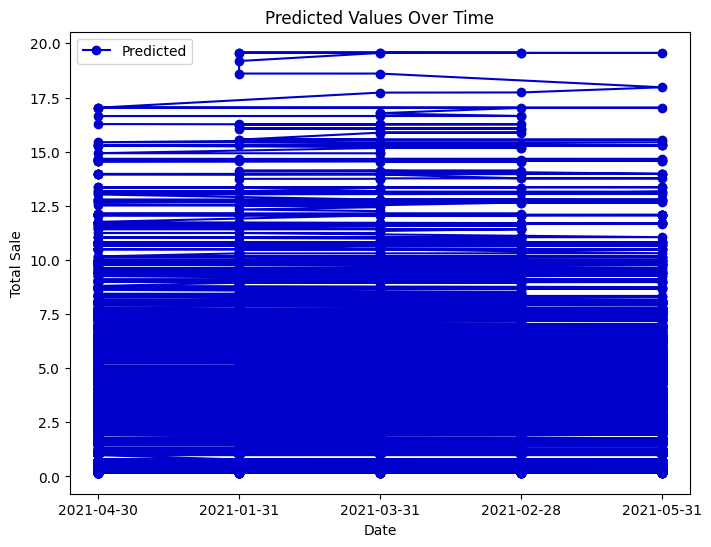

In [ ]:
date_column = df_final['month']

# Reset indeks untuk memastikan kecocokan dengan sort_indices
date_column_reset = date_column.reset_index(drop=True)

# Mendapatkan indeks yang diurutkan
sort_indices = y_pred.argsort()

# Plotting predicted values saja
plt.figure(figsize=(8, 6))
plt.plot(date_column_reset.iloc[sort_indices], y_pred[sort_indices], 'o-', label='Predicted')

# Menambahkan label dan judul
plt.title('Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sale')
plt.legend()

# Menampilkan diagram
plt.show()

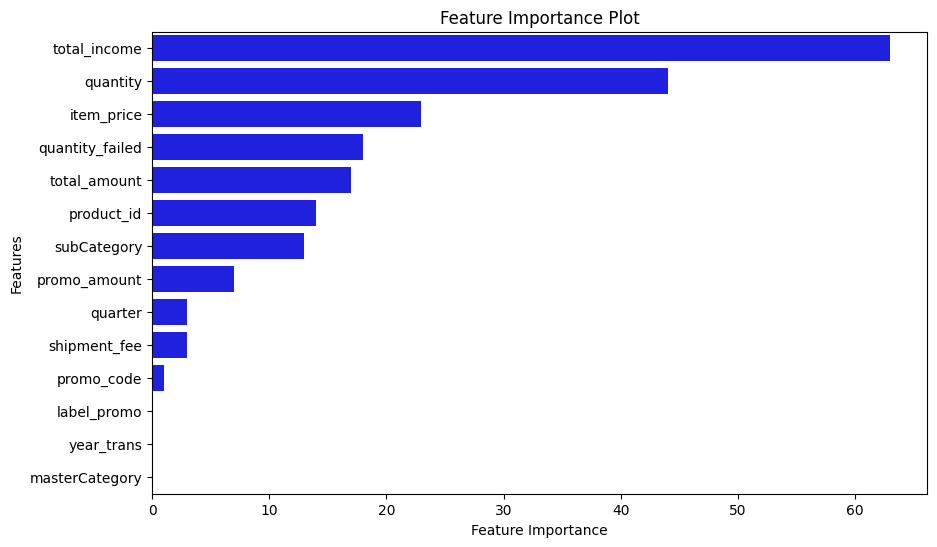

In [ ]:
feature_importance = model.feature_importances_
feature_names = X_train.columns

sorted_idx = feature_importance.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=feature_names[sorted_idx], color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

**Forecasting(Simulasi)**

In [ ]:
data_forecast = pd.read_csv('/content/drive/MyDrive/df_forecastbaru.csv')

In [ ]:
columns_to_drop = ['date_trans']

data_forecast.drop(columns=columns_to_drop, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_forecast['masterCategory'] = label_encoder.fit_transform(data_forecast['masterCategory'])
data_forecast['subCategory'] = label_encoder.fit_transform(data_forecast['subCategory'])
data_forecast['promo_code'] = label_encoder.fit_transform(data_forecast['promo_code'])

In [ ]:
kolom_untuk_diubah = ['quantity','label_promo', 'item_price', 'promo_code', 'promo_amount', 'shipment_fee', 'total_amount', 'total_income', 'quantity_failed', 'total_sale']

# Mengganti nilai-nilai pada kolom-kolom tersebut dengan 0
data_forecast.loc[:, kolom_untuk_diubah] = 0

# Tampilkan DataFrame setelah perubahan
print(data_forecast)

        product_id  quantity  item_price  promo_code  promo_amount  \
0          40433.0         0           0           0             0   
1          11420.0         0           0           0             0   
2          13157.0         0           0           0             0   
3          32349.0         0           0           0             0   
4          51730.0         0           0           0             0   
...            ...       ...         ...         ...           ...   
123144     13764.0         0           0           0             0   
123145     28172.0         0           0           0             0   
123146     23234.0         0           0           0             0   
123147     47455.0         0           0           0             0   
123148     38783.0         0           0           0             0   

        shipment_fee  total_amount  masterCategory  subCategory       month  \
0                  0             0               1            6  2022-05-31   
1

<ipython-input-74-5178df03284f>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_forecast.loc[:, kolom_untuk_diubah] = 0


In [ ]:
X_new = data_forecast[['product_id', 'quantity', 'item_price', 'promo_code', 'promo_amount', 'shipment_fee', 'total_amount',
                      'masterCategory', 'subCategory', 'quarter', 'year_trans', 'label_promo','total_income', 'quantity_failed']]

predictions = model.predict(X_new)

In [ ]:
X_new.head()

,product_id,quantity,item_price,promo_code,promo_amount,shipment_fee,total_amount,masterCategory,subCategory,quarter,year_trans,label_promo,total_income,quantity_failed
0,40433.0,0,0,0,0,0,0,1,6,2.0,2022.0,0,0,0
1,11420.0,0,0,0,0,0,0,1,38,2.0,2022.0,0,0,0
2,13157.0,0,0,0,0,0,0,1,38,2.0,2022.0,0,0,0
3,32349.0,0,0,0,0,0,0,0,42,2.0,2022.0,0,0,0
4,51730.0,0,0,0,0,0,0,0,10,2.0,2022.0,0,0,0


In [ ]:
predictions

array([0.56184429, 0.56184429, 0.56184429, ..., 0.56110008, 0.56110008,
       0.56110008])

In [ ]:
predictions = pd.DataFrame(np.expm1(predictions).round())

In [ ]:
import pandas as pd

y_pred_array = predictions.values.flatten()

# Membuat DataFrame baru dengan kolom prediksi dan fitur yang digunakan
result_df = pd.DataFrame({
    'predictions': y_pred_array,
    'product_id': data_forecast['product_id'],
    'masterCategory': data_forecast['masterCategory'],
    'subCategory': data_forecast['subCategory'],
    'quarter': data_forecast['quarter'],
    'month': data_forecast['month'],
    'total_sale': data_forecast['total_sale']
})

In [ ]:
result_df['month'] = pd.to_datetime(result_df['month'])

# Mendapatkan bulan dan tahun dari kolom 'month'
result_df['bulan'] = result_df['month'].dt.month
result_df['tahun'] = result_df['month'].dt.year

# Mengelompokkan berdasarkan 'bulan', 'tahun', dan 'masterCategory', kemudian menjumlahkan nilai total_sale
grouped_result = result_df.groupby(['bulan', 'tahun', 'masterCategory'])['predictions'].sum().reset_index()

print(grouped_result)

    bulan  tahun  masterCategory  predictions
0       5   2022               0      11215.0
1       5   2022               1      21199.0
2       5   2022               2       9175.0
3       5   2022               3        104.0
4       5   2022               4          1.0
5       5   2022               5       2506.0
6       5   2022               6         19.0
7       6   2022               0      10620.0
8       6   2022               1      20232.0
9       6   2022               2       8713.0
10      6   2022               3         97.0
11      6   2022               4          2.0
12      6   2022               5       2344.0
13      6   2022               6         17.0
14      7   2022               0       9429.0
15      7   2022               1      17660.0
16      7   2022               2       7717.0
17      7   2022               3         91.0
18      7   2022               4          1.0
19      7   2022               5       1989.0
20      7   2022               6  

In [ ]:
result_df.head()

,predictions,product_id,masterCategory,subCategory,quarter,month,total_sale,bulan,tahun
0,1.0,40433.0,1,6,2.0,2022-05-31,0,5,2022
1,1.0,11420.0,1,38,2.0,2022-05-31,0,5,2022
2,1.0,13157.0,1,38,2.0,2022-05-31,0,5,2022
3,1.0,32349.0,0,42,2.0,2022-05-31,0,5,2022
4,1.0,51730.0,0,10,2.0,2022-05-31,0,5,2022


### **4.1.2 Regresi**

**Model XGBoost**

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


train = df_final[(df_final['month'] <= '2022-03-31')].fillna(0)
valid = df_final[(df_final['month'] >= '2022-04-30') & (df_final['month'] <= '2022-07-31')].fillna(0)

In [ ]:
print(train.shape)
print(valid.shape)

(496777, 16)
(166354, 16)


In [ ]:
# Pilih variabel target dan variabel waktu (month)
target_variable = 'total_sale'

# Pisahkan variabel target dan variabel fitur (time_variable)
X_train = train.drop(columns=[target_variable, 'month'])
y_train = train[target_variable]
X_valid = valid.drop(columns=[target_variable, 'month'])
y_valid = valid[target_variable]

In [ ]:
# Buat dan latih model XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=3, alpha=10, n_estimators=30)
model.fit(X_train, y_train)

# Lakukan prediksi pada set validasi
predictions = model.predict(X_valid)

# Evaluasi model
mae = mean_absolute_error(y_valid, predictions)
mse = mean_squared_error(y_valid, predictions)
r2 = r2_score(y_valid, predictions)

# Tampilkan hasil evaluasi
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.231932731296903
Mean Squared Error (MSE): 0.27540299911151783
R-squared (R2): 0.8881998782953262


**Model LightGBM**

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

train = df_final[(df_final['month'] <= '2022-03-31')].fillna(0)
valid = df_final[(df_final['month'] >= '2022-04-30') & (df_final['month'] <= '2022-07-31')].fillna(0)

In [ ]:
# Pilih variabel target dan variabel waktu (month)
target_variable = 'total_sale'

# Pisahkan variabel target dan variabel fitur (time_variable)
X_train = train.drop(columns=[target_variable, 'month'])
y_train = train[target_variable]
X_test = valid.drop(columns=[target_variable, 'month'])
y_test = valid[target_variable]

In [ ]:
# Buat dan latih model LightGBM
model = lgb.LGBMRegressor(objective='regression', colsample_bytree=0.3, learning_rate=0.1,
                         max_depth=3, alpha=10, n_estimators=30)
model.fit(X_train, y_train)

# Lakukan prediksi pada set pengujian
y_pred = model.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,  y_pred)
r2 = r2_score(y_test,  y_pred)

# Tampilkan hasil evaluasi
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1404
[LightGBM] [Info] Number of data points in the train set: 496777, number of used features: 14
[LightGBM] [Info] Start training from score 1.411809
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Mean Absolute Error (MAE): 0.19182388652725788
Mean Squared Error (MSE): 0.19786836804095098
R-squared (R2): 0.919675138978694


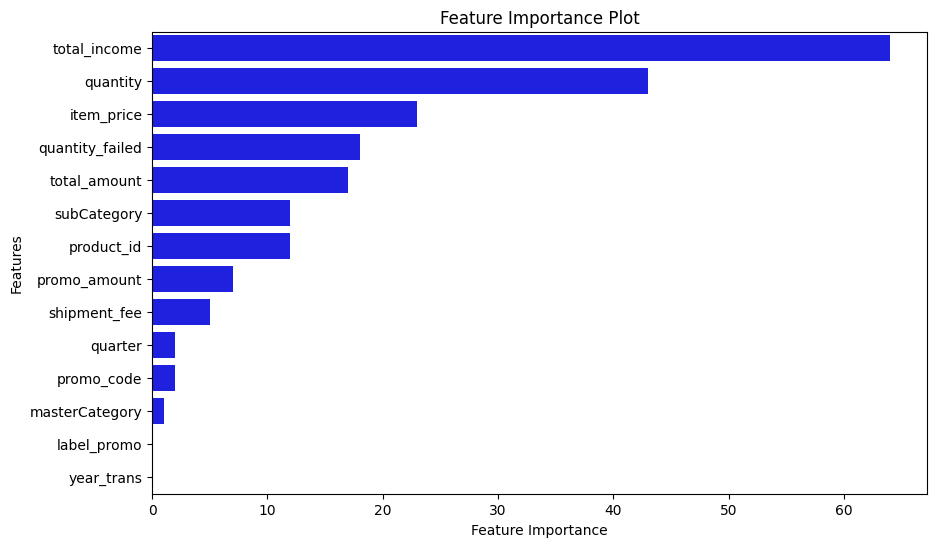

In [ ]:
feature_importance = model.feature_importances_
feature_names = X_train.columns

sorted_idx = feature_importance.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=feature_names[sorted_idx], color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [ ]:
feature_importance = model.feature_importances_
feature_names = X_train.columns

sorted_idx = feature_importance.argsort()[::-1]

for idx in sorted_idx:
    print(f"{feature_names[idx]}: {feature_importance[idx]}")

total_income: 64
quantity: 43
item_price: 23
quantity_failed: 18
total_amount: 17
subCategory: 12
product_id: 12
promo_amount: 7
shipment_fee: 5
quarter: 2
promo_code: 2
masterCategory: 1
label_promo: 0
year_trans: 0


### **4.1.3 Forecasting**

**New Dataset For Forecasting**

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=74e3d73f298af94d00fbc627ada595e7e89a250aff8fcb587cf86c799e0ac77f
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
forecast_transactions = pd.read_csv('/content/drive/MyDrive/df_finalfeature.csv')

In [ ]:
forecast_transactions.rename(columns = {'ds' : 'date_trans', 'unique_id' : 'product_id', 'y' : 'total_sale'}, inplace = True)

In [ ]:
forecast_transactions.rename(columns = {'month' : 'ds', 'product_id' : 'unique_id', 'total_sale' : 'y'}, inplace = True)

In [ ]:
forecast_transactions['unique_id'] = forecast_transactions['unique_id'].astype(int)

In [ ]:
groups_by_ticker = forecast_transactions.groupby('unique_id')
groups_by_ticker.groups.keys()

dict_keys([1163, 1164, 1165, 1525, 1526, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1561, 1562, 1563, 1565, 1566, 1567, 1569, 1570, 1571, 1572, 1573, 1575, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1587, 1588, 1590, 1591, 1592, 1594, 1595, 1596, 1597, 1598, 1599, 1603, 1604, 1605, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1634, 1635, 1636, 1637, 1638, 1641, 1642, 1644, 1645, 1646, 1647, 1648, 1649, 1651, 1653, 1654, 1656, 1657, 1658, 1662, 1668, 1670, 1671, 1673, 1678, 1689, 1697, 1727, 1728, 1729, 1730, 1731, 1752, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1762, 1763, 1764, 1765, 1766, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import pandas_udf, PandasUDFType
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

In [ ]:
from prophet import Prophet

def train_and_forecast(group):
  # Initiate the model
  m = Prophet()

  # Fit the model
  m.fit(group)
  # Make predictions
  future = m.make_future_dataframe(periods = 92)
  forecast = m.predict(future)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
  forecast['unique_id'] = group['unique_id'].iloc[0]

  # Return the forecasted results
  return forecast[['ds', 'unique_id', 'yhat', 'yhat_upper', 'yhat_lower']]

In [ ]:
# Convert the pandas dataframe into a spark dataframe
sdf = spark.createDataFrame(forecast_transactions)
# Define the restult schema
result_schema =StructType([
  StructField('ds',DateType()),
  StructField('unique_id',IntegerType()),
  StructField('yhat',FloatType()),
  StructField('yhat_upper',FloatType()),
  StructField('yhat_lower',FloatType())
  ])
# Train and forecast by ticker
spark_forecast = sdf.groupBy('unique_id').applyInPandas(train_and_forecast, schema=result_schema)
# Take a look at the results
spark_forecast.show(10)

+----------+---------+----------+----------+----------+
|        ds|unique_id|      yhat|yhat_upper|yhat_lower|
+----------+---------+----------+----------+----------+
|2021-02-28|     1163| 0.4015302| 1.9766742|-1.2049913|
|2021-04-30|     1163|0.73114145| 2.3054197|-0.7967742|
|2021-05-31|     1163| 0.8986488| 2.4799352|-0.8364991|
|2021-06-30|     1163| 1.0607527| 2.7278156|-0.4805449|
|2021-11-30|     1163| 1.8874826| 3.4576945|0.30633232|
|2021-12-31|     1163|   2.05499| 3.6799254| 0.4067763|
|2022-01-31|     1163| 2.2224972|  3.811716| 0.6662818|
|2022-03-31|     1163| 2.5413017| 4.2495866| 1.0131276|
|2022-04-30|     1163| 2.7034056| 4.3684635| 1.1128705|
|2022-07-31|     1163|  3.200524|  4.719755|  1.665014|
+----------+---------+----------+----------+----------+
only showing top 10 rows



In [ ]:
transactions_forecast = spark_forecast.toPandas()

In [ ]:
transactions_forecast.rename(columns={'ds': 'month', 'unique_id': 'product_id', 'y': 'total_sale'}, inplace = True)
transactions_forecast['month'] = transactions_forecast['month'].astype('datetime64[ns]')
transactions_forecast.head()

**Forecasting With LightGBM**

In [ ]:
data_forecast = pd.read_csv('/content/drive/MyDrive/result_df.csv')

In [ ]:
data_forecast.head()

,product_id,date,masterCategory,subCategory,date_trans,quantity,item_price,promo_code,promo_amount,shipment_fee,total_amount,quarter,label_promo,total_income,quantity_failed,total_sale,transactions,year,month_trans,year_trans
0,1163,2022-08-31,Apparel,Topwear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2022,8,2022
1,4363,2022-08-31,Apparel,Topwear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2022,8,2022
2,4363,2022-08-31,Apparel,Topwear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2022,8,2022
3,4363,2022-08-31,Apparel,Topwear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2022,8,2022
4,4363,2022-08-31,Apparel,Topwear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2022,8,2022


In [ ]:
columns_to_drop = ['date_trans']

data_forecast.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding pada kolom 'subCategory' dan 'masterCategory'
data_forecast['subCategory'] = label_encoder.fit_transform(data_forecast['subCategory'])
data_forecast['masterCategory'] = label_encoder.fit_transform(data_forecast['masterCategory'])

In [ ]:
data_forecast.fillna(0, inplace=True)

In [ ]:
data_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3172602 entries, 0 to 3172601
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   product_id       int64  
 1   date             object 
 2   masterCategory   int64  
 3   subCategory      int64  
 4   quantity         float64
 5   item_price       float64
 6   promo_code       float64
 7   promo_amount     float64
 8   shipment_fee     float64
 9   total_amount     float64
 10  quarter          int64  
 11  label_promo      float64
 12  total_income     float64
 13  quantity_failed  float64
 14  total_sale       float64
 15  transactions     float64
 16  year             int64  
 17  month_trans      int64  
 18  year_trans       int64  
dtypes: float64(11), int64(7), object(1)
memory usage: 459.9+ MB


In [ ]:
X_new = data_forecast[['product_id','quantity','item_price','promo_code','promo_amount','shipment_fee','total_amount',
                      'masterCategory','subCategory','quarter','year_trans','label_promo','total_income','quantity_failed']]
predictions = model.predict(X_new)

In [ ]:
predictions

array([0.56157154, 0.56157154, 0.56157154, ..., 0.56109657, 0.56109657,
       0.56124406])

In [ ]:
predictions = pd.DataFrame(np.expm1(predictions).round())

In [ ]:
import pandas as pd

predictions_array = predictions.values.flatten()

# Membuat DataFrame baru dengan kolom prediksi dan fitur yang digunakan
result_df = pd.DataFrame({
    'predictions': predictions_array,
    'product_id': data_forecast['product_id'],
    'masterCategory': data_forecast['masterCategory'],
    'subCategory': data_forecast['subCategory'],
    'quarter': data_forecast['quarter'],
    'date': data_forecast['date']
})

In [ ]:
# Menghitung proporsi masing-masing 'masterCategory'
category_counts = result_df['masterCategory'].value_counts(normalize=True)

data = pd.DataFrame()

for category, proportion in category_counts.items():
    category_data = result_df[result_df['masterCategory'] == category]
    data = data.append(category_data.sample(frac=0.04, random_state=42))

<ipython-input-128-6f2d2ec6f8b2>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(category_data.sample(frac=0.04, random_state=42))
<ipython-input-128-6f2d2ec6f8b2>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(category_data.sample(frac=0.04, random_state=42))
<ipython-input-128-6f2d2ec6f8b2>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(category_data.sample(frac=0.04, random_state=42))
<ipython-input-128-6f2d2ec6f8b2>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(category_data.sample(frac=0.04, random_state=42))
<ipython-input-128-6f2d2ec6f8b2>:8: Futu

In [ ]:
#resul_df.to_csv('/content/drive/MyDrive/predictions_lgbmmodel.csv', index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/predictions_lgbmmodel.csv')

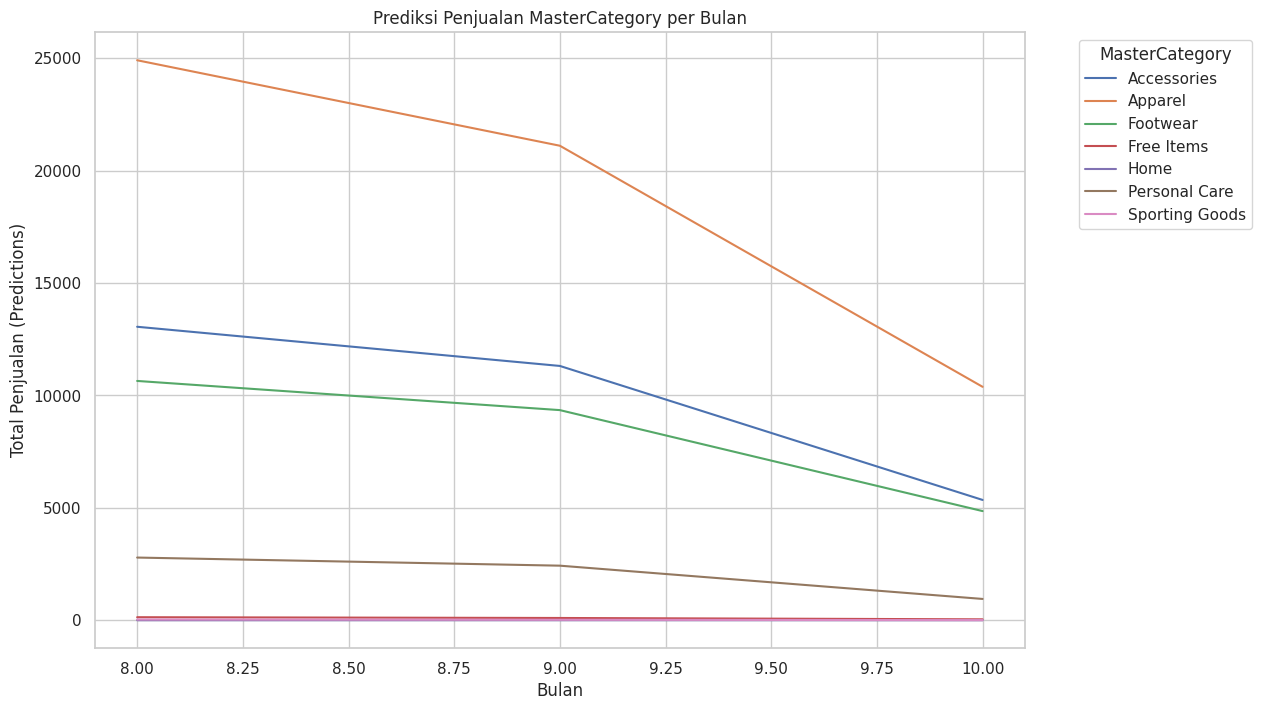

In [ ]:
# Mengubah kolom 'date' menjadi tipe data datetime
data['date'] = pd.to_datetime(data['date'])

# Mendapatkan bulan dan tahun dari kolom 'date'
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Mengelompokkan berdasarkan 'month', 'year', dan 'masterCategory', kemudian menjumlahkan nilai prediksi
grouped_df = data.groupby(['year', 'month', 'masterCategory'])['predictions'].sum().reset_index()

# Membuat plot menggunakan seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.lineplot(x='month', y='predictions', hue='masterCategory', data=grouped_df)
plt.title('Prediksi Penjualan MasterCategory per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan (Predictions)')
plt.legend(title='MasterCategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
data['month'] = pd.to_datetime(data['date'])

# Mendapatkan bulan dan tahun dari kolom 'month'
data['bulan'] = data['month'].dt.month
data['tahun'] = data['month'].dt.year

# Mengelompokkan berdasarkan 'bulan', 'tahun', dan 'masterCategory', kemudian menjumlahkan nilai total_sale
grouped = data.groupby(['bulan', 'tahun', 'masterCategory'])['predictions'].sum().reset_index()

print(grouped)

    bulan  tahun  masterCategory  predictions
0       8   2022     Accessories      13057.0
1       8   2022         Apparel      24913.0
2       8   2022        Footwear      10647.0
3       8   2022      Free Items        136.0
4       8   2022            Home          1.0
5       8   2022   Personal Care       2790.0
6       8   2022  Sporting Goods         35.0
7       9   2022     Accessories      11314.0
8       9   2022         Apparel      21110.0
9       9   2022        Footwear       9349.0
10      9   2022      Free Items        102.0
11      9   2022            Home          2.0
12      9   2022   Personal Care       2429.0
13      9   2022  Sporting Goods         22.0
14     10   2022     Accessories       5353.0
15     10   2022         Apparel      10385.0
16     10   2022        Footwear       4857.0
17     10   2022      Free Items         42.0
18     10   2022            Home          1.0
19     10   2022   Personal Care        949.0
20     10   2022  Sporting Goods  

### **4.1.4 Clustering (K-Means)**

In [ ]:
df_cluster = pd.read_csv('/content/drive/MyDrive/DatasetForDashboard/df_finallengkappp.csv')

In [ ]:
df_cluster.head()

,index,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,quantity_failed,total_sale
0,0,2018-07-29 15:22:01.458193,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"{'product_id': 54728, 'quantity': 1, 'item_pri...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676,-8.227893,111.969107,199832,54728,1,191247,0,1
1,1,2018-07-30 12:40:22.365620,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"{'product_id': 16193, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,10000,2018-08-03 01:29:03.415705,3.013470,107.802514,155526,16193,1,145526,0,1
2,2,2018-09-15 11:51:17.365620,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"{'product_id': 53686, 'quantity': 4, 'item_pri...",OVO,Success,0,NaN,10000,2018-09-18 08:41:49.422380,-2.579428,115.743885,550696,53686,4,135174,0,4
3,3,2018-11-01 11:23:48.365620,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"{'product_id': 20228, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,0,2018-11-05 17:42:27.954235,-3.602334,120.363824,271012,20228,1,271012,0,1
4,4,2018-12-18 11:20:30.365620,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"{'product_id': 55220, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,0,2018-12-23 17:24:07.361785,-3.602334,120.363824,198753,55220,1,198753,0,1


In [ ]:
df_cluster = df_cluster.groupby('product_id').agg({
    'total_sale': ['min','max','mean','sum'],  # Add 'sum' aggregation
}).reset_index()

# Convert 'product_id' column to integer
df_cluster['product_id'] = df_cluster['product_id'].astype(int)

# Flatten the MultiIndex columns
df_cluster.columns = [' '.join(col).strip() for col in df_cluster.columns.values]

# Rename columns for clarity
df_cluster.columns = ['product_id','min_sale','max_sale','avg_sale','total_sale']  # Add the new column

# Print the resulting DataFrame
print(df_cluster)

       product_id  min_sale  max_sale  avg_sale  total_sale
0            1163         0         6  1.357143          38
1            1164         0         3  1.173913          27
2            1165         0         2  1.000000          30
3            1525         1        16  1.516129          47
4            1526         0         3  1.200000          30
...           ...       ...       ...       ...         ...
44441       59995         1         4  1.444444          26
44442       59996         0         1  0.931034          27
44443       59998         0         3  1.142857          32
44444       59999         1         4  1.192308          31
44445       60000         0        16  2.083333          50

[44446 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

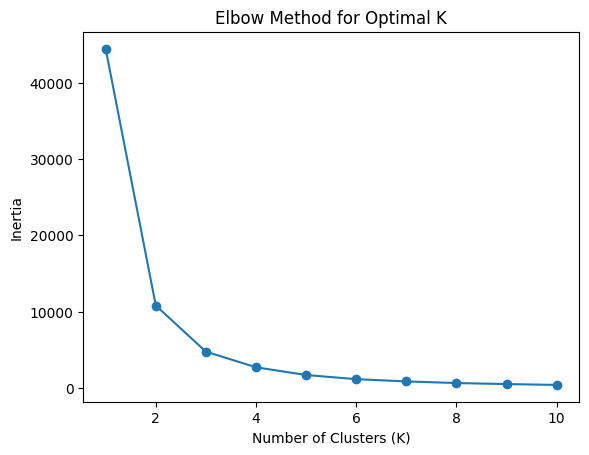

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_cluster['product_id'] = df_cluster['product_id'].astype(int)

# Select only the relevant columns for clustering
features = df_cluster[['product_id']]

# Standardize the features (important for k-means)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
selected_features = df_cluster[['total_sale']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(selected_features)

kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(features_scaled)

print("Cluster assignments for k=3:\n", df_cluster[['cluster', 'total_sale']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster assignments for k=3:
        cluster  total_sale
0            0          38
1            2          27
2            2          30
3            0          47
4            2          30
...        ...         ...
44441        2          26
44442        2          27
44443        2          32
44444        2          31
44445        0          50

[44446 rows x 2 columns]


In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  44446 non-null  int64  
 1   min_sale    44446 non-null  int64  
 2   max_sale    44446 non-null  int64  
 3   avg_sale    44446 non-null  float64
 4   total_sale  44446 non-null  int64  
 5   cluster     44446 non-null  int32  
dtypes: float64(1), int32(1), int64(4)
memory usage: 1.9 MB


In [ ]:
column_names = df_cluster.columns
print(column_names)

Index(['product_id', 'min_total_sale', 'max_total_sale', 'avg_total_sale',
       'total_sale', 'cluster'],
      dtype='object')


In [ ]:
cluster_column = 'cluster'
total_sale_column = 'total_sale'

# Filter data untuk cluster 0
cluster_0_data = df_cluster[df_cluster[cluster_column] == 0]

# Hitung max_total_sale untuk cluster 0
max_total_sale_cluster_0 = cluster_0_data[total_sale_column].mean()

# Print hasilnya
print(f'Max Total Sale for Cluster 0: {max_total_sale_cluster_0}')

Max Total Sale for Cluster 0: 42.09013902037969


In [ ]:
cluster_1_data = df_cluster[df_cluster['cluster'] == 1]

# Menampilkan nilai terkecil dan terbesar dari kolom 'total_sale' hanya untuk Cluster 1
min_total_sale_cluster_1 = cluster_1_data['total_sale'].min()
max_total_sale_cluster_1 = cluster_1_data['total_sale'].max()
mean_total_sale_cluster_1 = cluster_1_data['total_sale'].mean()

print(f"Nilai terkecil dari 'total_sale' untuk Cluster 1: {min_total_sale_cluster_1}")
print(f"Nilai terbesar dari 'total_sale' untuk Cluster 1: {max_total_sale_cluster_1}")
print(f"Nilai terbesar dari 'total_sale' untuk Cluster 1: {mean_total_sale_cluster_1}")

Nilai terkecil dari 'total_sale' untuk Cluster 1: 51
Nilai terbesar dari 'total_sale' untuk Cluster 1: 114
Nilai terbesar dari 'total_sale' untuk Cluster 1: 58.42360826152373


In [ ]:
cluster_counts = df_cluster['cluster'].value_counts()
cluster_counts

0    20069
2    17066
1     7311
Name: cluster, dtype: int64

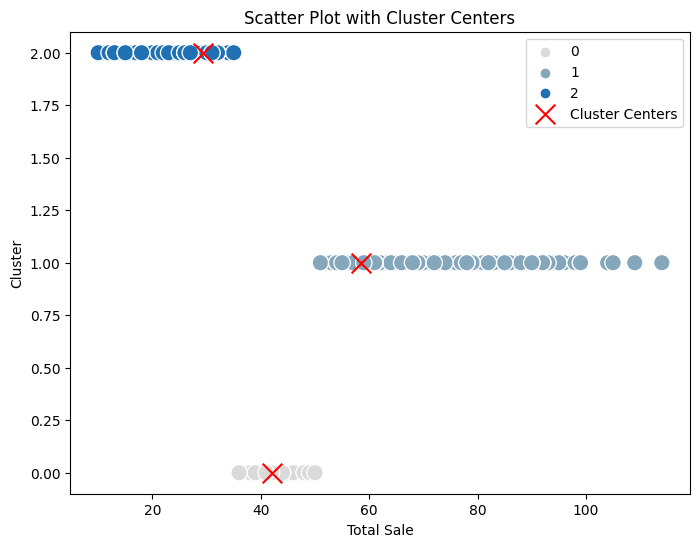

In [ ]:
plt.figure(figsize=(8, 6))

# Define a colormap with dark blue for more clusters and lighter shades for fewer clusters
num_clusters = df_cluster['cluster'].nunique()
colors = sns.color_palette('Blues', n_colors=num_clusters)

# Adjust saturation for each color to create a gradient effect
saturations = np.linspace(0, 1, num_clusters)
adjusted_colors = [sns.desaturate(color, sat) for color, sat in zip(colors, saturations)]

# Plot each point with a different color based on the cluster assignment
sns.scatterplot(x='total_sale', y='cluster', data=df_cluster, hue='cluster', palette=adjusted_colors, s=140)

# Plotting the average total_sale for each cluster
cluster_avg_sale = df_cluster.groupby('cluster')['total_sale'].mean().reset_index()
plt.scatter(cluster_avg_sale['total_sale'], cluster_avg_sale['cluster'], marker='x', s=200, color='red', label='Cluster Centers')

# Labeling the axes and the plot
plt.xlabel('Total Sale')
plt.ylabel('Cluster')
plt.title('Scatter Plot with Cluster Centers')
plt.legend()
plt.show()

In [ ]:
df_cluster = pd.read_csv('/content/drive/MyDrive/df_clusterbaru.csv')

In [ ]:
df_cluster.head()

,product_id,min_total_sale,max_total_sale,avg_total_sale,total_sale,cluster
0,1163,0,6,1.357143,38,0
1,1164,0,3,1.173913,27,2
2,1165,0,2,1.000000,30,2
3,1525,1,16,1.516129,47,0
4,1526,0,3,1.200000,30,2
